# Detección de intrusos en redes

Estos datos fueron usados para la edición de 1999 del KDD cup. Los datos fueron generados por Lincoln Labs: _Nueve semanas de registro de paquetes TCP fueron recolectadas para una red LAN de una oficina de las fuerzas aéreas de USA._ Durante el uso de la LAN, _varios ataques_ fueron ejecutados por el personal. El paquete crudo fue agregado junto con la información de la conexión. 

Para cada registro, algunas características extra fueron derivadas, basados en conocimiento del dominio sobre ataques a redes; _hay 38 tipos diferentes de ataques, pertenecientes a 4 categorías principales_. Algunos tipos de ataque aparecen solo en los datos de prueba(test data), y las frecuencias de los tipo de ataque en los conjuntos de entrenamiento y prueba no son las mismas(para hacerlo más realista). Información adicional sobre los datos puede ser encontrada en (http://kdd.ics.uci.edu/databases/kddcup99/task.html) y los resumenes de los resultados de la competencia KDD cup (http://cseweb.ucsd.edu/~elkan/clresults.html). En la última página también se indica que hay una matriz de costo asociada con las equivocaciones.  El ganador de la competencia usó árboles de decisión C5 en combinación con boosting y bagging.

**Referencias**:
- PNrule: _A New Framework for Learning Classifier Models in Data Mining (A Case-Study in Network Intrusion Detection) (2000) by R. Agarwal and M. V. Joshi_. This paper proposes a new, very simple rule learning algorithm, and tests it on the network intrusion dataset. In the first stage, rules are learned to identify the target class, and then in the second stage, rules are learned to identify cases that were incorrectly classified as positive according to the first rules.


A continuación aplicaremos algunos conceptos de minería de datos en la solución de un problema real.

## Obtención de los datos

[KDD Cup 1999 Data](http://kdd.ics.uci.edu/databases/kddcup99/kddcup99.html)

**Abstract**

This is the data set used for The Third International Knowledge Discovery and Data Mining Tools Competition, which was held in conjunction with KDD-99 The Fifth International Conference on Knowledge Discovery and Data Mining. The competition task was to build a network intrusion detector, a predictive model capable of distinguishing between **bad** connections, called intrusions or attacks, and **good** normal connections. This database contains a standard set of data to be audited, which includes a wide variety of intrusions simulated in a military network environment.

**Data files**:

- [kddcup.names](http://kdd.ics.uci.edu/databases/kddcup99/kddcup.names) A list of features.
- [kddcup.data.gz](http://kdd.ics.uci.edu/databases/kddcup99/kddcup.data.gz) The full data set (18M; 743M Uncompressed)
- [kddcup.data_10_percent.gz](http://kdd.ics.uci.edu/databases/kddcup99/kddcup.data_10_percent.gz) A 10% subset. (2.1M; 75M Uncompressed)
- [kddcup.newtestdata_10_percent_unlabeled.gz](http://kdd.ics.uci.edu/databases/kddcup99/kddcup.newtestdata_10_percent_unlabeled.gz) (1.4M; 45M Uncompressed)
- [kddcup.testdata.unlabeled.gz](http://kdd.ics.uci.edu/databases/kddcup99/kddcup.testdata.unlabeled.gz) (11.2M; 430M Uncompressed)
- [kddcup.testdata.unlabeled_10_percent.gz](http://kdd.ics.uci.edu/databases/kddcup99/kddcup.testdata.unlabeled_10_percent.gz) (1.4M;45M Uncompressed)
- [corrected.gz](http://kdd.ics.uci.edu/databases/kddcup99/corrected.gz) Test data with corrected labels.
- [training_attack_types](http://kdd.ics.uci.edu/databases/kddcup99/training_attack_types) A list of intrusion types.
- [typo-correction.txt](http://kdd.ics.uci.edu/databases/kddcup99/typo-correction.txt) A brief note on a typo in the data set that has been corrected (6/26/07) 

## Tareas originales

Estas son las [tareas originales](http://kdd.ics.uci.edu/databases/kddcup99/task.html) que se le dieron a cada participante en su momento.

The task for the classifier learning contest organized in conjunction with the KDD'99 conference was to learn a predictive model (i.e. a classifier) capable of distinguishing between legitimate and illegitimate connections in a computer network.  Here is a [detailed description of the task](http://kdd.ics.uci.edu/databases/kddcup99/task.html).  The training and test data were generously made available by Prof. [Sal Stolfo](http://www.cs.columbia.edu/%7Esal/) of Columbia University and Prof. [Wenke Lee](http://www.cs.columbia.edu/%7Ewenke/) of North Carolina State University.

This document is adapted from the paper _Cost-based Modeling and Evaluation for Data Mining With Application to Fraud and Intrusion Detection_: Results from the JAM Project by Salvatore J. Stolfo, Wei Fan, Wenke Lee, Andreas Prodromidis, and Philip K. Chan.

**INTRUSION DETECTOR LEARNING**
Software to detect network intrusions protects a computer network from unauthorized users, including perhaps insiders.  The intrusion detector learning task is to build a predictive model (i.e. a classifier) capable of distinguishing between **bad** connections, called intrusions or attacks, and **good** normal connections.

The 1998 DARPA Intrusion Detection Evaluation Program was prepared and managed by MIT Lincoln Labs. The objective was to survey and evaluate research in intrusion detection.  A standard set of data to be audited, which includes a wide variety of intrusions simulated in a military network environment, was provided.  The 1999 KDD intrusion detection contest uses a version of this dataset.

Lincoln Labs set up an environment to acquire nine weeks of raw TCP dump data for a local-area network (LAN) simulating a typical U.S. Air Force LAN.  They operated the LAN as if it were a true Air Force environment, but peppered it with multiple attacks.

The raw training data was about four gigabytes of compressed binary TCP dump data from seven weeks of network traffic.  This was processed into about five million connection records.  Similarly, the two weeks of test data yielded around two million connection records.

A connection is a sequence of TCP packets starting and ending at some well defined times, between which data flows to and from a source IP address to a target IP address under some well defined protocol.  Each connection is labeled as either normal, or as an attack, with exactly one specific attack type.  Each connection record consists of about 100 bytes.

Attacks fall into four main categories:

- **DOS**: denial-of-service, e.g. syn flood;
- **R2L**: unauthorized access from a remote machine, e.g. guessing password;
- **U2R**:  unauthorized access to local superuser (root) privileges, e.g., various _buffer overflow_ attacks;
- **probing**: surveillance and other probing, e.g., port scanning.

It is important to note that the test data is not from the same probability distribution as the training data, and it includes specific attack types not in the training data.  This makes the task more realistic.  Some intrusion experts believe that most novel attacks are variants of known attacks and the "signature" of known attacks can be sufficient to catch novel variants.  **The datasets contain a total of 24 [training attack types](http://kdd.ics.uci.edu/databases/kddcup99/training_attack_types), with an additional 14 types in the test data only.**

| ATTACK | CATEGORY |
| --- | --- |
| back | dos
| buffer_overflow | u2r
| ftp_write | r2l
| guess_passwd | r2l
| imap | r2l
| ipsweep | probe
| land | dos
| loadmodule | u2r
| multihop | r2l
| neptune | dos
| nmap | probe
| perl | u2r
| phf | r2l
| pod | dos
| portsweep | probe
| rootkit | u2r
| satan | probe
| smurf | dos
| spy | r2l
| teardrop | dos
| warezclient | r2l
| warezmaster | r2l


### Resultados de la competencia
For the results of the other KDD'99 contest, the knowledge discovery contest, see [here](http://cseweb.ucsd.edu/~elkan/clresults.html). 

## Análisis exploratorio de datos - EDA

### Cargar los datos crudos

Se descomprimen los archivos para empezar el análisis.

-rw-r--r--@ 1 ernestogiron  staff    45M Nov 11 19:31 corrected<br/>
-rw-r--r--@ 1 ernestogiron  staff   708M Nov 11 19:43 kddcup.data<br/>
-rw-r--r--@ 1 ernestogiron  staff    71M Nov 11 19:31 kddcup.data_10_percent<br/>
-rw-r--r--@ 1 ernestogiron  staff    43M Nov 11 19:41 kddcup.newtestdata_10_percent_unlabeled<br/>

Podemos observar que los datos son de tipo texto separados por comas (CSV) y sin cabecera. ej.

% more kddcup.data_10_percent 
0,tcp,http,SF,181,5450,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,8,8,0.00,0.00,0.00,0.00,1.00,0.00,0.00,9,9,1.00,0.00,0.11,0.00,0.00,0.00,0.00,0.00,normal.
0,tcp,http,SF,239,486,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,8,8,0.00,0.00,0.00,0.00,1.00,0.00,0.00,19,19,1.00,0.00,0.05,0.00,0.00,0.00,0.00,0.00,normal.
0,tcp,http,SF,235,1337,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,8,8,0.00,0.00,0.00,0.00,1.00,0.00,0.00,29,29,1.00,0.00,0.03,0.00,0.00,0.00,0.00,0.00,normal.
0,tcp,http,SF,219,1337,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,6,6,0.00,0.00,0.00,0.00,1.00,0.00,0.00,39,39,1.00,0.00,0.03,0.00,0.00,0.00,0.00,0.00,normal.


#### Cargamos el 10% de los datos



In [2]:
# Cargamos la librería pandas para procesar los datos como tablas
import pandas as pd

ataques = pd.read_csv('data/kddcup.data_10_percent', sep=',', decimal='.', header=None)
# visualizar los datos
ataques.head()

,0,1,2,3,4,5,6,7,8,9,...,32,33,34,35,36,37,38,39,40,41
0,0,tcp,http,SF,181,5450,0,0,0,0,...,9,1.0,0.0,0.11,0.0,0.0,0.0,0.0,0.0,normal.
1,0,tcp,http,SF,239,486,0,0,0,0,...,19,1.0,0.0,0.05,0.0,0.0,0.0,0.0,0.0,normal.
2,0,tcp,http,SF,235,1337,0,0,0,0,...,29,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal.
3,0,tcp,http,SF,219,1337,0,0,0,0,...,39,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal.
4,0,tcp,http,SF,217,2032,0,0,0,0,...,49,1.0,0.0,0.02,0.0,0.0,0.0,0.0,0.0,normal.


Como se puede observar claramente el archivo cargo sin cabecera, la cual se encuentra en un archivo separado llamado
[kddcup.names](http://kdd.ics.uci.edu/databases/kddcup99/kddcup.names)

Ahora procedemos a integrarlo para identificar cada columna o atributo de nuestro conjunto de datos


In [3]:
# Hay varias formas de hacerlo entre ellas, volver a cargar el archivo utilizando la opción "names=[]"
# ataques = pd.read_csv('data/kddcup.data_10_percent', sep=',', decimal='.', names=['col1', 'col2', 'col3', ...])
# y asignar un vector de nombres de columnas al dataframe existente

atributos = ['duration', 'protocol_type', 'service', 'flag', 'src_bytes', 'dst_bytes', 'land', 'wrong_fragment', 
             'urgent', 'hot', 'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell', 'su_attempted', 
             'num_root', 'num_file_creations', 'num_shells', 'num_access_files', 'num_outbound_cmds', 
             'is_host_login', 'is_guest_login', 'count', 'srv_count', 'serror_rate', 'srv_serror_rate', 
             'rerror_rate', 'srv_rerror_rate', 'same_srv_rate', 'diff_srv_rate', 'srv_diff_host_rate', 
             'dst_host_count', 'dst_host_srv_count', 'dst_host_same_srv_rate', 'dst_host_diff_srv_rate', 
             'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate', 'dst_host_serror_rate', 
             'dst_host_srv_serror_rate', 'dst_host_rerror_rate', 'dst_host_srv_rerror_rate', 'attack_types']


ataques.columns = atributos
ataques.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack_types
0,0,tcp,http,SF,181,5450,0,0,0,0,...,9,1.0,0.0,0.11,0.0,0.0,0.0,0.0,0.0,normal.
1,0,tcp,http,SF,239,486,0,0,0,0,...,19,1.0,0.0,0.05,0.0,0.0,0.0,0.0,0.0,normal.
2,0,tcp,http,SF,235,1337,0,0,0,0,...,29,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal.
3,0,tcp,http,SF,219,1337,0,0,0,0,...,39,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal.
4,0,tcp,http,SF,217,2032,0,0,0,0,...,49,1.0,0.0,0.02,0.0,0.0,0.0,0.0,0.0,normal.


In [4]:
len(atributos)

42

### Verificamos el tipo de dato en cada atributo o predictor

In [5]:
ataques.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 494021 entries, 0 to 494020
Data columns (total 42 columns):
duration                       494021 non-null int64
protocol_type                  494021 non-null object
service                        494021 non-null object
flag                           494021 non-null object
src_bytes                      494021 non-null int64
dst_bytes                      494021 non-null int64
land                           494021 non-null int64
wrong_fragment                 494021 non-null int64
urgent                         494021 non-null int64
hot                            494021 non-null int64
num_failed_logins              494021 non-null int64
logged_in                      494021 non-null int64
num_compromised                494021 non-null int64
root_shell                     494021 non-null int64
su_attempted                   494021 non-null int64
num_root                       494021 non-null int64
num_file_creations             494021 

Observamos que hay 3 predictores categóricos y la variable independiente o que contiene las etiquetas a predecir; el resto de atributos son de tipo númerico. Existen dos predictores categóricos o nominales (*land, logged_in, root_shell, su_attempted, is_host_login, is_guest_login*) pero estan ya normalizados o convertidos a número, como categorías binarias.

In [6]:
# Estadísticas basicas de variables de tipo númerico 
ataques.describe()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
count,494021.000000,4.940210e+05,4.940210e+05,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000,...,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000
mean,47.979302,3.025610e+03,8.685324e+02,0.000045,0.006433,0.000014,0.034519,0.000152,0.148247,0.010212,...,232.470778,188.665670,0.753780,0.030906,0.601935,0.006684,0.176754,0.176443,0.058118,0.057412
std,707.746472,9.882181e+05,3.304000e+04,0.006673,0.134805,0.005510,0.782103,0.015520,0.355345,1.798326,...,64.745380,106.040437,0.410781,0.109259,0.481309,0.042133,0.380593,0.380919,0.230590,0.230140
min,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,4.500000e+01,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,255.000000,46.000000,0.410000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,5.200000e+02,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,255.000000,255.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,1.032000e+03,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,255.000000,255.000000,1.000000,0.040000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,58329.000000,6.933756e+08,5.155468e+06,1.000000,3.000000,3.000000,30.000000,5.000000,1.000000,884.000000,...,255.000000,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Buscamos valores nulos

Como se pudo observar en las dos salidas o resultados anteriores, no existen valores nulos (ver fila "count"), todas las observaciones suman 494021 para todos los atributos.

In [7]:
# Otra forma de visualizar los datos faltantes
ataques.isnull().sum()

duration                       0
protocol_type                  0
service                        0
flag                           0
src_bytes                      0
dst_bytes                      0
land                           0
wrong_fragment                 0
urgent                         0
hot                            0
num_failed_logins              0
logged_in                      0
num_compromised                0
root_shell                     0
su_attempted                   0
num_root                       0
num_file_creations             0
num_shells                     0
num_access_files               0
num_outbound_cmds              0
is_host_login                  0
is_guest_login                 0
count                          0
srv_count                      0
serror_rate                    0
srv_serror_rate                0
rerror_rate                    0
srv_rerror_rate                0
same_srv_rate                  0
diff_srv_rate                  0
srv_diff_h

Si existieran nulos, una forma de llenarlos seria utiliando un criterio como la media, eg.<br/>
``` pyhton
ataques.num_root.fillna(ataques.num_root.mean(), inplace=True)
```

### Creamos variables dummies para los atributos categóricos

In [8]:
# identificamos los posibles valores de cada predictor categórico
# protocol_type, service, flag
ataques.protocol_type.unique() # type of the protocol

array(['tcp', 'udp', 'icmp'], dtype=object)

In [9]:
ataques.service.unique() # network service on the destination

array(['http', 'smtp', 'finger', 'domain_u', 'auth', 'telnet', 'ftp',
       'eco_i', 'ntp_u', 'ecr_i', 'other', 'private', 'pop_3', 'ftp_data',
       'rje', 'time', 'mtp', 'link', 'remote_job', 'gopher', 'ssh', 'name',
       'whois', 'domain', 'login', 'imap4', 'daytime', 'ctf', 'nntp',
       'shell', 'IRC', 'nnsp', 'http_443', 'exec', 'printer', 'efs',
       'courier', 'uucp', 'klogin', 'kshell', 'echo', 'discard', 'systat',
       'supdup', 'iso_tsap', 'hostnames', 'csnet_ns', 'pop_2', 'sunrpc',
       'uucp_path', 'netbios_ns', 'netbios_ssn', 'netbios_dgm', 'sql_net',
       'vmnet', 'bgp', 'Z39_50', 'ldap', 'netstat', 'urh_i', 'X11',
       'urp_i', 'pm_dump', 'tftp_u', 'tim_i', 'red_i'], dtype=object)

In [10]:
ataques.flag.unique() # normal or error status of the connection 

array(['SF', 'S1', 'REJ', 'S2', 'S0', 'S3', 'RSTO', 'RSTR', 'RSTOS0',
       'OTH', 'SH'], dtype=object)

### Tipos de Ataques

Los encontrados en los datos de entrenamiento del 10%

In [11]:
ataques.attack_types.unique()

array(['normal.', 'buffer_overflow.', 'loadmodule.', 'perl.', 'neptune.',
       'smurf.', 'guess_passwd.', 'pod.', 'teardrop.', 'portsweep.',
       'ipsweep.', 'land.', 'ftp_write.', 'back.', 'imap.', 'satan.',
       'phf.', 'nmap.', 'multihop.', 'warezmaster.', 'warezclient.',
       'spy.', 'rootkit.'], dtype=object)

Teniendo en cuenta los principales grupos de atques descritos anteriormente ( **DOS, R2L, U2R, probing**), creamos una nueva variable para re-agrupar los tipos de ataques en esas 4 categorias

In [12]:
# Crear un nuevo predictor de categorías de tipos de ataques
ataques['attack_category'] = ataques.attack_types.map({'normal.': 'normal', 'buffer_overflow.':'u2r', 
                                                       'loadmodule.':'u2r', 'perl.':'u2r', 'neptune.':'dos',
                                                       'smurf.':'dos','guess_passwd.':'r2l', 'pod.':'dos', 
                                                       'teardrop.':'dos', 'portsweep.':'probe','ipsweep.':'probe',
                                                       'land.':'dos','ftp_write.':'r2l','back.':'dos','imap.':'r2l',
                                                       'satan.':'probe','phf.':'r2l','nmap.':'probe',
                                                       'multihop.':'r2l','warezmaster.':'r2l','warezclient.':'r2l',
                                                       'spy.':'r2l','rootkit.':'u2r'})

ataques.tail()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack_types,attack_category
494016,0,tcp,http,SF,310,1881,0,0,0,0,...,1.0,0.0,0.01,0.05,0.00,0.01,0.0,0.0,normal.,normal
494017,0,tcp,http,SF,282,2286,0,0,0,0,...,1.0,0.0,0.17,0.05,0.00,0.01,0.0,0.0,normal.,normal
494018,0,tcp,http,SF,203,1200,0,0,0,0,...,1.0,0.0,0.06,0.05,0.06,0.01,0.0,0.0,normal.,normal
494019,0,tcp,http,SF,291,1200,0,0,0,0,...,1.0,0.0,0.04,0.05,0.04,0.01,0.0,0.0,normal.,normal
494020,0,tcp,http,SF,219,1234,0,0,0,0,...,1.0,0.0,0.17,0.05,0.00,0.01,0.0,0.0,normal.,normal


In [13]:
# Comprobamos los valores del nuevo predictor
ataques.attack_category.unique()

array(['normal', 'u2r', 'dos', 'r2l', 'probe'], dtype=object)

In [14]:
# Si deseamos tener unos datos mas limpios o claros
# Podemos remover el punto al final de cada valor del atributo tipo de ataque
ataques['attack_types'] = ataques['attack_types'].str.replace('.','')
ataques.attack_types.unique()

array(['normal', 'buffer_overflow', 'loadmodule', 'perl', 'neptune',
       'smurf', 'guess_passwd', 'pod', 'teardrop', 'portsweep', 'ipsweep',
       'land', 'ftp_write', 'back', 'imap', 'satan', 'phf', 'nmap',
       'multihop', 'warezmaster', 'warezclient', 'spy', 'rootkit'], dtype=object)

In [15]:
# Creamos las dummies
# ataques['land'] = ataques.land.map({'attr1':0, 'attr2':1})
# ataques.land.unique()
# Como las variables anteriores todas tienen más de 2 valores diferentes
# dummy utilizando la función "get_dummies" de la librería pandas
pd.get_dummies(ataques.protocol_type, prefix='protocol_type').head(10)

,protocol_type_icmp,protocol_type_tcp,protocol_type_udp
0,0,1,0
1,0,1,0
2,0,1,0
3,0,1,0
4,0,1,0
5,0,1,0
6,0,1,0
7,0,1,0
8,0,1,0
9,0,1,0


In [16]:
protocol_type_dummies = pd.get_dummies(ataques.protocol_type, prefix='protocol_type').iloc[:, 1:]
service_dummies = pd.get_dummies(ataques.service, prefix='service').iloc[:, 1:]
flag_dummies = pd.get_dummies(ataques.flag, prefix='flag').iloc[:, 1:]

# Unimos las columnas de las variables dummy con el DataFrame original
# notar: axis=0 significa filas, axis=1 significa columnas
ataques = pd.concat([ataques, protocol_type_dummies, service_dummies, flag_dummies], axis=1)

# visualizamos el DataFrame actualizado
ataques.head(10)

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,flag_REJ,flag_RSTO,flag_RSTOS0,flag_RSTR,flag_S0,flag_S1,flag_S2,flag_S3,flag_SF,flag_SH
0,0,tcp,http,SF,181,5450,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,0,tcp,http,SF,239,486,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0,tcp,http,SF,235,1337,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,0,tcp,http,SF,219,1337,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,0,tcp,http,SF,217,2032,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
5,0,tcp,http,SF,217,2032,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
6,0,tcp,http,SF,212,1940,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
7,0,tcp,http,SF,159,4087,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
8,0,tcp,http,SF,210,151,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
9,0,tcp,http,SF,212,786,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0


Se puede observar que de 41 predictores, ahora pasamos a tener 119.

In [17]:
ataques.columns.values

array(['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
       'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot',
       'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell',
       'su_attempted', 'num_root', 'num_file_creations', 'num_shells',
       'num_access_files', 'num_outbound_cmds', 'is_host_login',
       'is_guest_login', 'count', 'srv_count', 'serror_rate',
       'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate',
       'same_srv_rate', 'diff_srv_rate', 'srv_diff_host_rate',
       'dst_host_count', 'dst_host_srv_count', 'dst_host_same_srv_rate',
       'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
       'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
       'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
       'dst_host_srv_rerror_rate', 'attack_types', 'attack_category',
       'protocol_type_tcp', 'protocol_type_udp', 'service_X11',
       'service_Z39_50', 'service_auth', 'service_bgp', 'service_courier',
       

In [18]:
# Ejemplo de obtener los nombres de las variables dummy del predictor eg. flag
flag_dummies.columns.values

array(['flag_REJ', 'flag_RSTO', 'flag_RSTOS0', 'flag_RSTR', 'flag_S0',
       'flag_S1', 'flag_S2', 'flag_S3', 'flag_SF', 'flag_SH'], dtype=object)

In [19]:
# ataques.columns.values # Listar todas las columnas
# Suponiendo que ya ejecutamos el paso anterior
# creamos la lista de las columnas o predictores mas robustos a utilizar en nuestro modelo
feature_cols = ['duration', 'src_bytes',
       'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot',
       'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell',
       'su_attempted', 'num_root', 'num_file_creations', 'num_shells',
       'num_access_files', 'num_outbound_cmds', 'is_host_login',
       'is_guest_login', 'count', 'srv_count', 'serror_rate',
       'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate',
       'same_srv_rate', 'diff_srv_rate', 'srv_diff_host_rate',
       'dst_host_count', 'dst_host_srv_count', 'dst_host_same_srv_rate',
       'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
       'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
       'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
       'dst_host_srv_rerror_rate', 'protocol_type_tcp',
       'protocol_type_udp', 'service_X11', 'service_Z39_50',
       'service_auth', 'service_bgp', 'service_courier',
       'service_csnet_ns', 'service_ctf', 'service_daytime',
       'service_discard', 'service_domain', 'service_domain_u',
       'service_echo', 'service_eco_i', 'service_ecr_i', 'service_efs',
       'service_exec', 'service_finger', 'service_ftp', 'service_ftp_data',
       'service_gopher', 'service_hostnames', 'service_http',
       'service_http_443', 'service_imap4', 'service_iso_tsap',
       'service_klogin', 'service_kshell', 'service_ldap', 'service_link',
       'service_login', 'service_mtp', 'service_name',
       'service_netbios_dgm', 'service_netbios_ns', 'service_netbios_ssn',
       'service_netstat', 'service_nnsp', 'service_nntp', 'service_ntp_u',
       'service_other', 'service_pm_dump', 'service_pop_2',
       'service_pop_3', 'service_printer', 'service_private',
       'service_red_i', 'service_remote_job', 'service_rje',
       'service_shell', 'service_smtp', 'service_sql_net', 'service_ssh',
       'service_sunrpc', 'service_supdup', 'service_systat',
       'service_telnet', 'service_tftp_u', 'service_tim_i', 'service_time',
       'service_urh_i', 'service_urp_i', 'service_uucp',
       'service_uucp_path', 'service_vmnet', 'service_whois', 'flag_REJ',
       'flag_RSTO', 'flag_RSTOS0', 'flag_RSTR', 'flag_S0', 'flag_S1',
       'flag_S2', 'flag_S3', 'flag_SF', 'flag_SH']

label_names = ataques.attack_types.unique()
label_ctg_names = ataques.attack_category.unique()

In [20]:
ataques.shape

(494021, 120)

### Aplicamos algunos métodos con todos los predictores

Antes de realizar una busqueda exhaustiva de los mejores predictores que representan el conjunto de datos, 
creamos un modelo utilizando varios metodos ML como k-means clustering, PCA y/o árboles de decisión. Solo con el fin de explorar un poco los datos, y ver la significancia o importancia de las variables, para luego seleccionar las mejores.


### Agrupamiento o k-mean

In [21]:
%matplotlib inline

from time import time
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale

plt.style.use('seaborn-white')

np.random.seed(35)

X = ataques[feature_cols]
data = scale(X)

n_samples, n_features = ataques.shape
n_attacks = len(label_ctg_names) #len(np.unique(ataques.attack_category))
labels = ataques.attack_category

sample_size = 300

print("n_attacks: %d, \t n_samples %d, \t n_features %d"
      % (n_attacks, n_samples, n_features))

print(82 * '_')
print('init\t\ttime\tinertia\t\thomo\tcompl\tv-meas\tARI\tAMI\tsilhouette')

def bench_k_means(estimator, name, data):
    t0 = time()
    estimator.fit(data)
    print('%-9s\t%.2fs\t%i\t\t%.3f\t%.3f\t%.3f\t%.3f\t%.3f\t%.3f'
          % (name, (time() - t0), estimator.inertia_,
             metrics.homogeneity_score(labels, estimator.labels_),
             metrics.completeness_score(labels, estimator.labels_),
             metrics.v_measure_score(labels, estimator.labels_),
             metrics.adjusted_rand_score(labels, estimator.labels_),
             metrics.adjusted_mutual_info_score(labels,  estimator.labels_),
             metrics.silhouette_score(data, estimator.labels_,
                                      metric='euclidean',
                                      sample_size=sample_size)))

bench_k_means(KMeans(init='k-means++', n_clusters=n_attacks, n_init=10),
              name="k-means++", data=data)

bench_k_means(KMeans(init='random', n_clusters=n_attacks, n_init=10),
              name="random", data=data)

# in this case the seeding of the centers is deterministic, hence we run the
# kmeans algorithm only once with n_init=1
pca = PCA(n_components=n_attacks).fit(data)
bench_k_means(KMeans(init=pca.components_, n_clusters=n_attacks, n_init=1),
              name="PCA-based", data=data)

print(82 * '_')

n_attacks: 5, 	 n_samples 494021, 	 n_features 120
__________________________________________________________________________________
init		time	inertia		homo	compl	v-meas	ARI	AMI	silhouette
k-means++	37.55s	44031754		0.626	0.323	0.426	0.393	0.323	0.771
random   	26.11s	45633024		0.839	0.431	0.569	0.480	0.431	0.609
PCA-based	3.78s	44122511		0.805	0.388	0.524	0.465	0.388	0.602
__________________________________________________________________________________


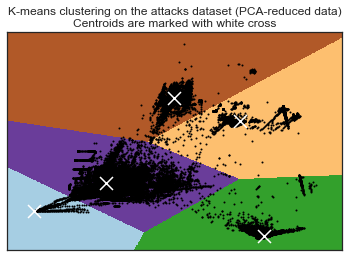

In [22]:
# #############################################################################
# Visualize the results on PCA-reduced data

reduced_data = PCA(n_components=2).fit_transform(data)
kmeans = KMeans(init='k-means++', n_clusters=n_attacks, n_init=10)
kmeans.fit(reduced_data)

# Step size of the mesh. Decrease to increase the quality of the VQ.
h = .02     # point in the mesh [x_min, x_max]x[y_min, y_max].

# Plot the decision boundary. For that, we will assign a color to each
x_min, x_max = reduced_data[:, 0].min() - 1, reduced_data[:, 0].max() + 1
y_min, y_max = reduced_data[:, 1].min() - 1, reduced_data[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Obtain labels for each point in mesh. Use last trained model.
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1)
plt.clf()
plt.imshow(Z, interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap=plt.cm.Paired,
           aspect='auto', origin='lower')

plt.plot(reduced_data[:, 0], reduced_data[:, 1], 'k.', markersize=2)
# Plot the centroids as a white X
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1],
            marker='x', s=169, linewidths=3,
            color='w', zorder=10)
plt.title('K-means clustering on the attacks dataset (PCA-reduced data)\n'
          'Centroids are marked with white cross')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.show()

### Gráficamos todos los tipos de ataques (24) en 2D

In [23]:
# Utilizamos el número completo de clases de ataques encontrados en el 10% de los datos 
t0 = time()

# Es necesario reducir la dimensionalidad de los datos para poder visualizar
reduced_data = PCA(n_components=2).fit_transform(data) # X scaled
kmclf = KMeans(init='k-means++', n_clusters=24, n_init=10)
kmclf.fit(reduced_data)

#pd.Series(kmclf.labels_).value_counts()
#kmclf.cluster_centers_
#kmclf.labels_
#kmclf.inertia_
print("Tiempo total: %.2fs" % (time() - t0))

Tiempo total: 46.03s


In [24]:
len(kmclf.labels_)

494021

In [25]:
kmclf.inertia_

11543.162415484354

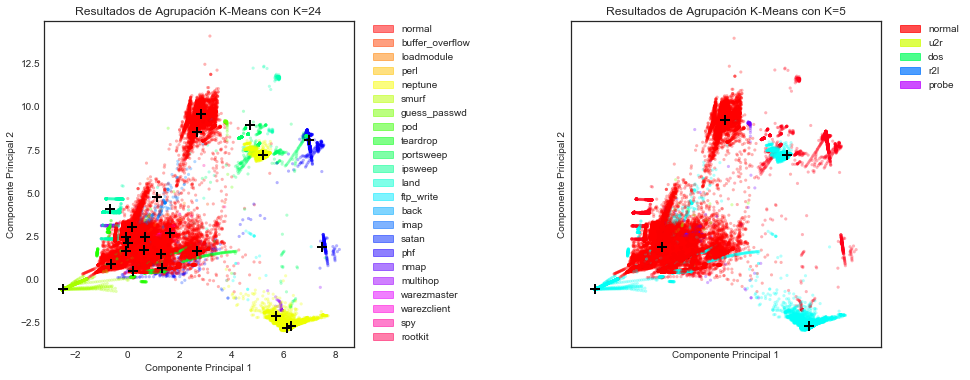

Tiempo total: 17.55s


In [26]:
t0 = time()
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(15,6))

#fig.tight_layout()
plt.subplots_adjust(wspace = 0.7)
# plt.subplots_adjust(right = 0.5)

plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())

#labels = pd.factorize(y.type.unique())
labels_attack_types = pd.factorize(label_names) #ataques.attack_types.unique())
labels_attack_category = pd.factorize(label_ctg_names) #ataques.attack_category.unique())
color_idx_attack_types = pd.factorize(ataques.attack_types)[0]
color_idx_attack_category = pd.factorize(ataques.attack_category)[0]
cmap = plt.cm.hsv # plt.cm.prism # 

ax1.set_title('Resultados de Agrupación K-Means con K=24')
ax1.set_ylabel('Componente Principal 2')
ax2.set_title('Resultados de Agrupación K-Means con K=5')
ax2.set_ylabel('Componente Principal 2')
ax1.scatter(reduced_data[:, 0], reduced_data[:, 1], s=10, c=color_idx_attack_types, cmap=cmap, 
            alpha=0.3, edgecolors='none')
ax2.scatter(reduced_data[:, 0], reduced_data[:, 1], s=10, c=color_idx_attack_category, cmap=cmap, 
            alpha=0.3, edgecolors='none')
ax1.scatter(kmclf.cluster_centers_[:,0], kmclf.cluster_centers_[:,1], marker='+', s=100, c='k', linewidth=2)
ax2.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], marker='+', s=100, c='k', linewidth=2)

# Leyendas para las clases (y) , dado que no realizamos el gráfico de dispersión por clase.
handles_attack_types = []
handles_attack_category = []
norm1 = mpl.colors.Normalize(vmin=0.0, vmax=len(label_names))
norm2 = mpl.colors.Normalize(vmin=0.0, vmax=len(label_ctg_names))

for i, v in zip(labels_attack_types[0], labels_attack_types[1]):
    handles_attack_types.append(mpl.patches.Patch(color=cmap(norm1(i)), label=v, alpha=0.5))

ax1.legend(handles=handles_attack_types, bbox_to_anchor=(1.05, 1), loc=0, borderaxespad=0.)

for i, v in zip(labels_attack_category[0], labels_attack_category[1]):
    handles_attack_category.append(mpl.patches.Patch(color=cmap(norm2(i)), label=v, alpha=0.7))

ax2.legend(handles=handles_attack_category, bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

# Leyenda de la abscisa X para ambos gráficos
for ax in fig.axes:
    ax.set_xlabel('Componente Principal 1')

plt.show()
print("Tiempo total: %.2fs" % (time() - t0))

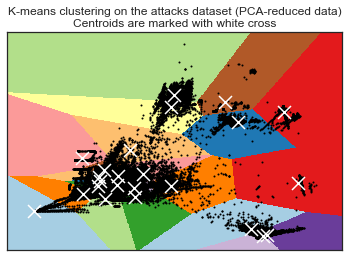

In [27]:
# Obtain labels for each point in mesh. Use last trained model.
Z = kmclf.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)

plt.figure(1)
plt.clf()
plt.imshow(Z, interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap=plt.cm.Paired,
           aspect='auto', origin='lower')

plt.plot(reduced_data[:, 0], reduced_data[:, 1], 'k.', markersize=2)
# Plot the centroids as a white X
centroids = kmclf.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1],
            marker='x', s=169, linewidths=3,
            color='w', zorder=10)
plt.title('K-means clustering on the attacks dataset (PCA-reduced data)\n'
          'Centroids are marked with white cross')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.show()

In [28]:
pd.DataFrame([reduced_data[:,:].std(axis=0, ddof=0), pca.explained_variance_ratio_[:2],
              np.cumsum(pca.explained_variance_ratio_[:2])],
              index=['Desviación Estándar', 'Proporción de Varianza', 'Proporción Acumulada'],
              columns=['PC1', 'PC1'])

,PC1,PC1
Desviación Estándar,3.449025,2.401227
Proporción de Varianza,0.105272,0.051026
Proporción Acumulada,0.105272,0.156298


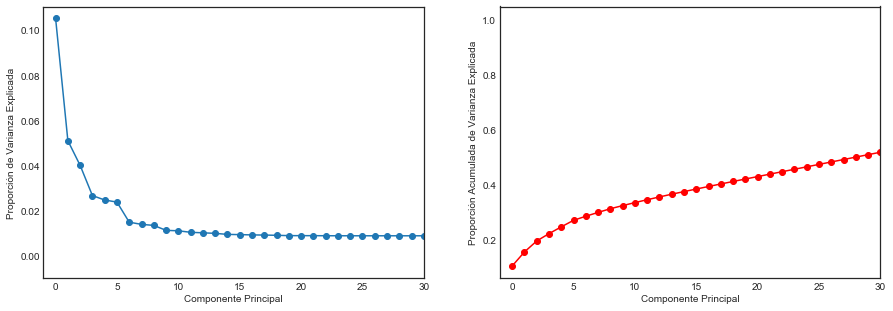

In [29]:
# Utilizando pca completo
pcaAlldata = PCA().fit(data)
fig , (ax1,ax2) = plt.subplots(1,2, figsize=(15,5))

# Gráfico Izq.
ax1.plot(pcaAlldata.explained_variance_ratio_, '-o')
ax1.set_ylabel('Proporción de Varianza Explicada')
ax1.set_ylim(ymin=-0.01)

# Gráfico Der.
ax2.plot(np.cumsum(pcaAlldata.explained_variance_ratio_), '-ro')
ax2.set_ylabel('Proporción Acumulada de Varianza Explicada')
ax2.set_ylim(ymax=1.05)

for ax in fig.axes:
    ax.set_xlabel('Componente Principal')
    ax.set_xlim(-1,30)

### Jerarquización

In [30]:
# Esta Jerarquización toma mucho tiempo por lo que no se procesará
# Utilizando scipy
# from scipy.cluster import hierarchy
# t0 = time()

# # data = scale(X)
# X_scale= pd.DataFrame(data, index=ataques.attack_types, columns=X.columns)
# fig, (ax1,ax2,ax3) = plt.subplots(1,3, figsize=(20,20))

# for linkage, cluster, ax in zip([hierarchy.complete(X_scale), hierarchy.average(X_scale), hierarchy.single(X_scale)],
#                                 ['c1','c2','c3'],
#                                 [ax1,ax2,ax3]):
#     cluster = hierarchy.dendrogram(linkage, labels=X.index, orientation='right', color_threshold=0, 
#                                    leaf_font_size=10, ax=ax, truncate_mode='lastp', p=24, show_leaf_counts=True)

# ax1.set_title('Enlace Completo')
# ax2.set_title('Enlace Promedio')
# ax3.set_title('Enlace Simple');

# print("Tiempo total: %.2fs" % (time() - t0))

### Árbol de decisión

In [31]:
t0 = time()
# Definimos X (predictores) e y (respuesta)
X = ataques[feature_cols]
y = ataques.attack_types # attack_category

# seperamos los datos en entrenamiento y validación
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

# Ajustamos un árbol de clasificación con 3 niveles máximo (max_depth=3) sobre todos los datos
from sklearn.tree import DecisionTreeClassifier
treeclf = DecisionTreeClassifier(random_state=1) # max_depth=3, 
treeclf.fit(X_train,y_train)
print("Tiempo total: %.2fs" % (time() - t0))

Tiempo total: 5.14s


In [32]:
# Verificamos la precisión de nuestro modelo, tanto como los datos de entrenamiento y los de validación
treeclf.score(X_train,y_train) # Podemos notar que esta sobreajustado

0.99999460210787683

In [33]:
treeclf.score(X_test,y_test)

0.99961135491393127

In [34]:
treeclf.predict(X_test)[:20]

array(['smurf', 'smurf', 'neptune', 'smurf', 'smurf', 'smurf', 'smurf',
       'smurf', 'smurf', 'normal', 'normal', 'neptune', 'neptune',
       'neptune', 'normal', 'normal', 'normal', 'smurf', 'normal', 'normal'], dtype=object)

### Gráficamos el primer árbol

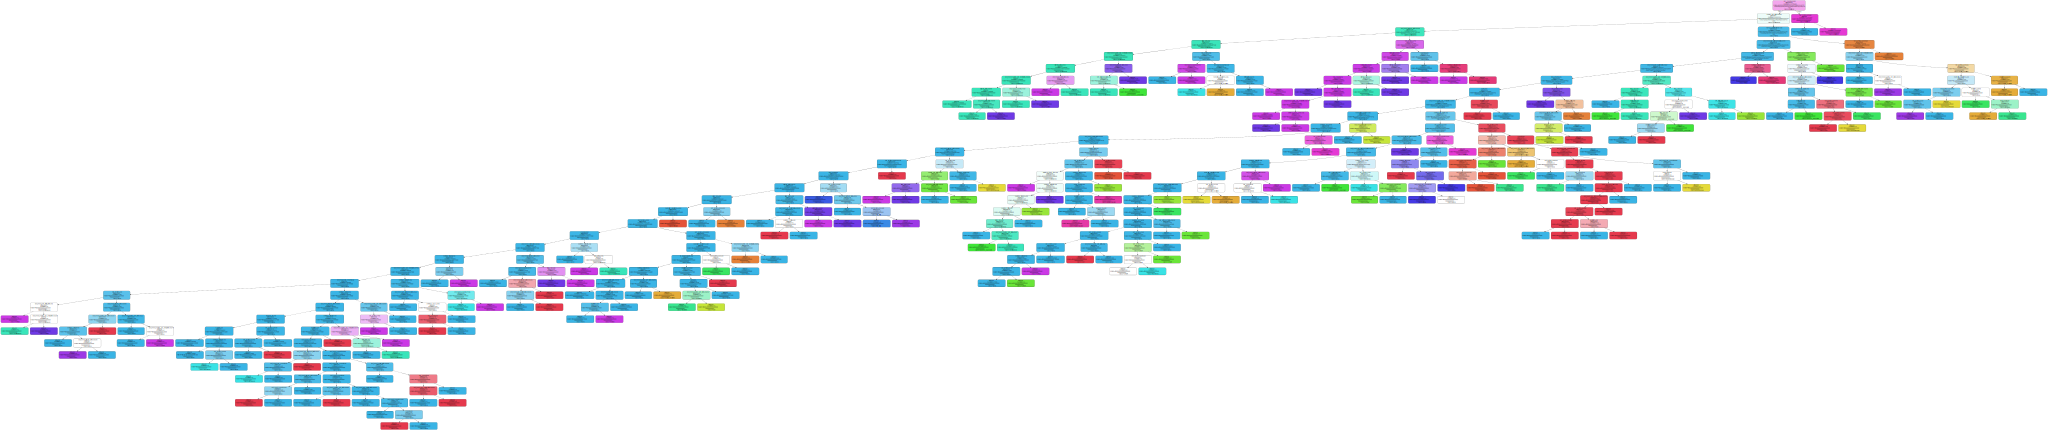

In [35]:
from sklearn.tree import export_graphviz
import graphviz
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline
plt.style.use('seaborn-white')

t0 = time()

# Exportamos los datos del arbol a un archivo
export_graphviz(treeclf,out_file='./data/ataques.dot',  
                impurity=True, filled=True, rounded=True, special_characters=True, 
                feature_names=feature_cols, 
                class_names= label_names ) # attack_category

# Leemos los datos guardados en el paso anterior
with open('./data/ataques.dot') as f:
    dot_graph=f.read()

# Creamos la gráfica a partir de los datos anteriores
graphviz.Source(dot_graph)

#print("Tiempo total: %.2fs" % (time() - t0))
# En la línea de comandos se puede utilizar lo sgte para guardar la gráfica en un archivo, 
# Ejecute esta línea para convertirlo formato PNG:
# dot -Tpng g_vehicles.dot -o g_vehicles.png

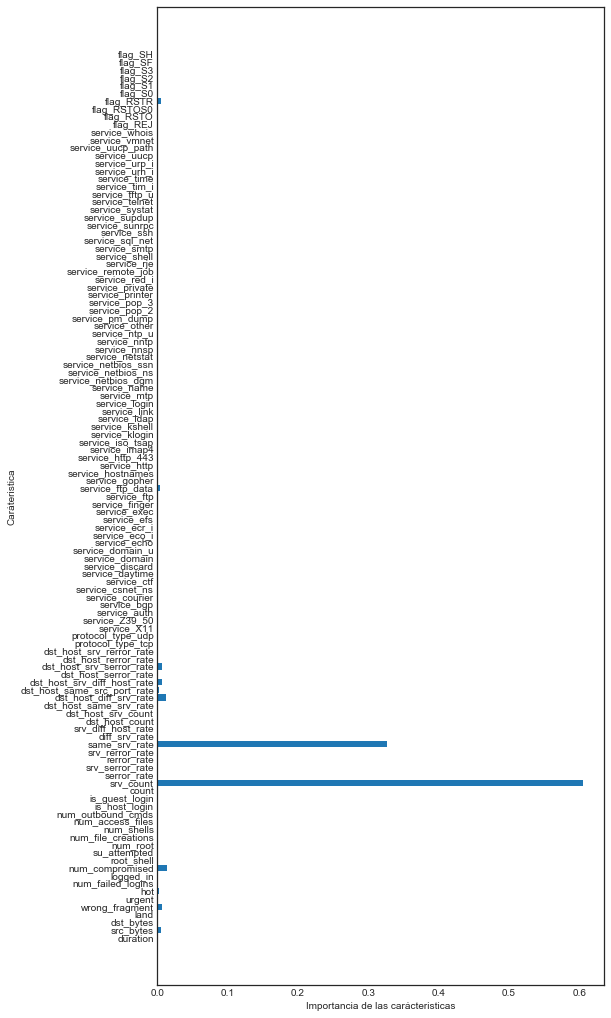

In [36]:
caract=len(feature_cols)
plt.figure(figsize=(8,18))
plt.barh(range(caract),treeclf.feature_importances_)
plt.yticks(np.arange(caract),feature_cols)
plt.xlabel("Importancia de las carácteristicas")
plt.ylabel("Caráteristica")
plt.show()

In [37]:
# computar la importancia de los predictores
pd.DataFrame({'feature':feature_cols, 'importance':treeclf.feature_importances_}).sort_values(by='importance', ascending=False)

,feature,importance
20,srv_count,0.604750
25,same_srv_rate,0.326444
9,num_compromised,0.013022
31,dst_host_diff_srv_rate,0.011660
33,dst_host_srv_diff_host_rate,0.007088
35,dst_host_srv_serror_rate,0.006106
4,wrong_fragment,0.006071
1,src_bytes,0.004974
108,flag_RSTR,0.004812
58,service_ftp_data,0.003327


La poda (pruning) puede reducir el sobreajuste (overfitting) del modelo. El clasificador de árboles de decisión de Scikit-Learn no soporta la poda actualmente, pero se pueden ajustar los valores minimos del número de ejemplos en cada hoja y/o ajustar la profundidad máxima del árbol, que son necesarios para evitar este problema. 

Aqui usaremos validación cruzada con diferentes valores para la profundidad con el fin de optimizar del árbol.

In [38]:
# Esto puede tomar varios minutos debido a la cantidad de datos de la muestra
# Abajo se muestra la gráfica resultante

# from sklearn.cross_validation import KFold
# from sklearn.metrics import accuracy_score
# from sklearn.cross_validation import train_test_split

# print(X_train.values.shape)
# kfold = KFold(X_train.shape[0], n_folds=10)
# accs = []
# max_depths = range(1, 20)
# for max_depth in max_depths:
#     k_accs = []
#     for train, test in kfold:
#         Xr, Xt, yr, yt = X_train.iloc[train], X_train.iloc[test], y_train.iloc[train], y_train.iloc[test]
#         clf = DecisionTreeClassifier(max_depth=max_depth)
#         clf.fit(Xr, yr)
#         ypred = clf.predict(Xt)
#         k_accs.append(accuracy_score(yt, ypred))
#     accs.append(np.mean(k_accs))
# # plot the accuracies as a function of max_depth
# plt.plot(max_depths, accs, linewidth=2.5)
# plt.show()

![fig3_crossval](fig3_crossval.png)

El menor valor para el parámetro max_depth para el cual la precisión alcanza un pico o se vuelve constante la precisión es alrededor de 15. Entonces ahora evaluaremos el mejor árbol desde la validación cruzada contra nuestro juego de datos de validación.

In [39]:
# Matriz de confusión para todos los tipos de ataques (no por categórias principales)
# from sklearn.metrics import confusion_matrix
# clf = DecisionTreeClassifier(max_depth=15)
# clf.fit(Xr, yr)
# ypred = clf.predict(Xt)
# confusion_matrix(yt, ypred), accuracy_score(yt, ypred)


### Selección de los mejores atributos o predictores

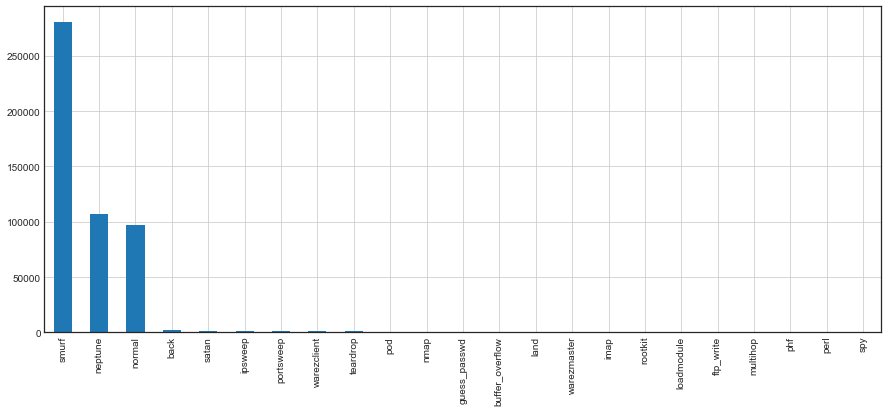

In [40]:
# Veamos la distribucción de los ataques
ataques.attack_types.value_counts().plot(kind='bar', grid=True, figsize=(15, 6))

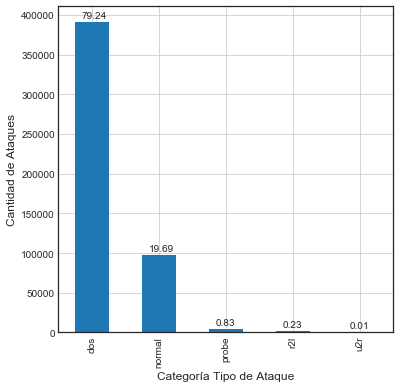

In [41]:
# ataques.attack_category.value_counts().plot(kind='pie', grid=True, figsize=(10, 10), autopct='%.2f', fontsize=20)
ax = ataques.attack_category.value_counts().plot(kind='bar', grid=True, figsize=(6, 6))
ax.set_xlabel("Categoría Tipo de Ataque", fontsize=12)
ax.set_ylabel("Cantidad de Ataques", fontsize=12)
x_offset = -0.15
y_offset = 5000
for p in ax.patches:
    b = p.get_bbox()
    val = "{:.2f}".format((b.y1 + b.y0) / len(ataques) * 100)       
    ax.annotate(val, ((b.x0 + b.x1)/2 + x_offset, b.y1 + y_offset))

### Evaluación de la relación entre variables

### Matríz de Correlación 

In [42]:
corr = ataques.corr()
corr

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,flag_REJ,flag_RSTO,flag_RSTOS0,flag_RSTR,flag_S0,flag_S1,flag_S2,flag_S3,flag_SF,flag_SH
duration,1.000000,0.004258,0.005440,-0.000452,-0.003235,0.003786,0.013213,0.005239,-0.017265,0.058095,...,-0.016260,0.002157,0.021772,0.148471,-0.031344,-0.000728,-0.000456,0.002990,0.021548,-0.000998
src_bytes,0.004258,1.000000,-0.000002,-0.000020,-0.000139,-0.000005,0.004483,-0.000027,0.001701,0.000119,...,-0.000734,0.041407,-0.000014,0.000189,-0.001416,0.000116,0.000064,0.002325,-0.001725,-0.000045
dst_bytes,0.005440,-0.000002,1.000000,-0.000175,-0.001254,0.016288,0.004365,0.049330,0.047814,0.023298,...,-0.006305,-0.000449,-0.000124,0.000099,-0.012154,0.008182,0.006520,0.000474,0.014036,-0.000387
land,-0.000452,-0.000020,-0.000175,1.000000,-0.000318,-0.000017,-0.000295,-0.000065,-0.002784,-0.000038,...,-0.001601,-0.000229,-0.000031,-0.000286,0.014434,-0.000072,-0.000047,-0.000030,-0.012075,-0.000098
wrong_fragment,-0.003235,-0.000139,-0.001254,-0.000318,1.000000,-0.000123,-0.002106,-0.000467,-0.019908,-0.000271,...,-0.011446,-0.001635,-0.000225,-0.002042,-0.022064,-0.000513,-0.000333,-0.000215,0.026372,-0.000702
urgent,0.003786,-0.000005,0.016288,-0.000017,-0.000123,1.000000,0.000356,0.141996,0.006164,0.014285,...,-0.000617,-0.000088,-0.000012,-0.000110,-0.001189,-0.000028,-0.000018,-0.000012,0.001421,-0.000038
hot,0.013213,0.004483,0.004365,-0.000295,-0.002106,0.000356,1.000000,0.008740,0.105305,0.007348,...,-0.010586,0.002573,-0.000208,0.006109,-0.020400,0.000490,0.006376,0.003828,0.023071,-0.000650
num_failed_logins,0.005239,-0.000027,0.049330,-0.000065,-0.000467,0.141996,0.008740,1.000000,-0.001145,0.006907,...,-0.002346,0.171209,-0.000046,0.011795,-0.004523,-0.000105,-0.000068,0.057936,-0.010307,-0.000144
logged_in,-0.017265,0.001701,0.047814,-0.002784,-0.019908,0.006164,0.105305,-0.001145,1.000000,0.013612,...,-0.100065,-0.006299,-0.001969,-0.002649,-0.192889,0.023097,0.015890,0.006986,0.227275,-0.006140
num_compromised,0.058095,0.000119,0.023298,-0.000038,-0.000271,0.014285,0.007348,0.006907,0.013612,1.000000,...,-0.001362,-0.000195,-0.000027,0.000785,-0.002626,-0.000061,0.000122,-0.000026,0.003032,-0.000084


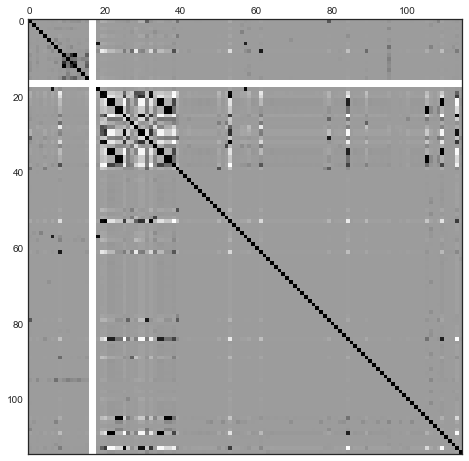

In [43]:
#plt.figure(figsize=(20,20))
f, ax = plt.subplots(figsize=(10, 8))
ax.matshow(corr)

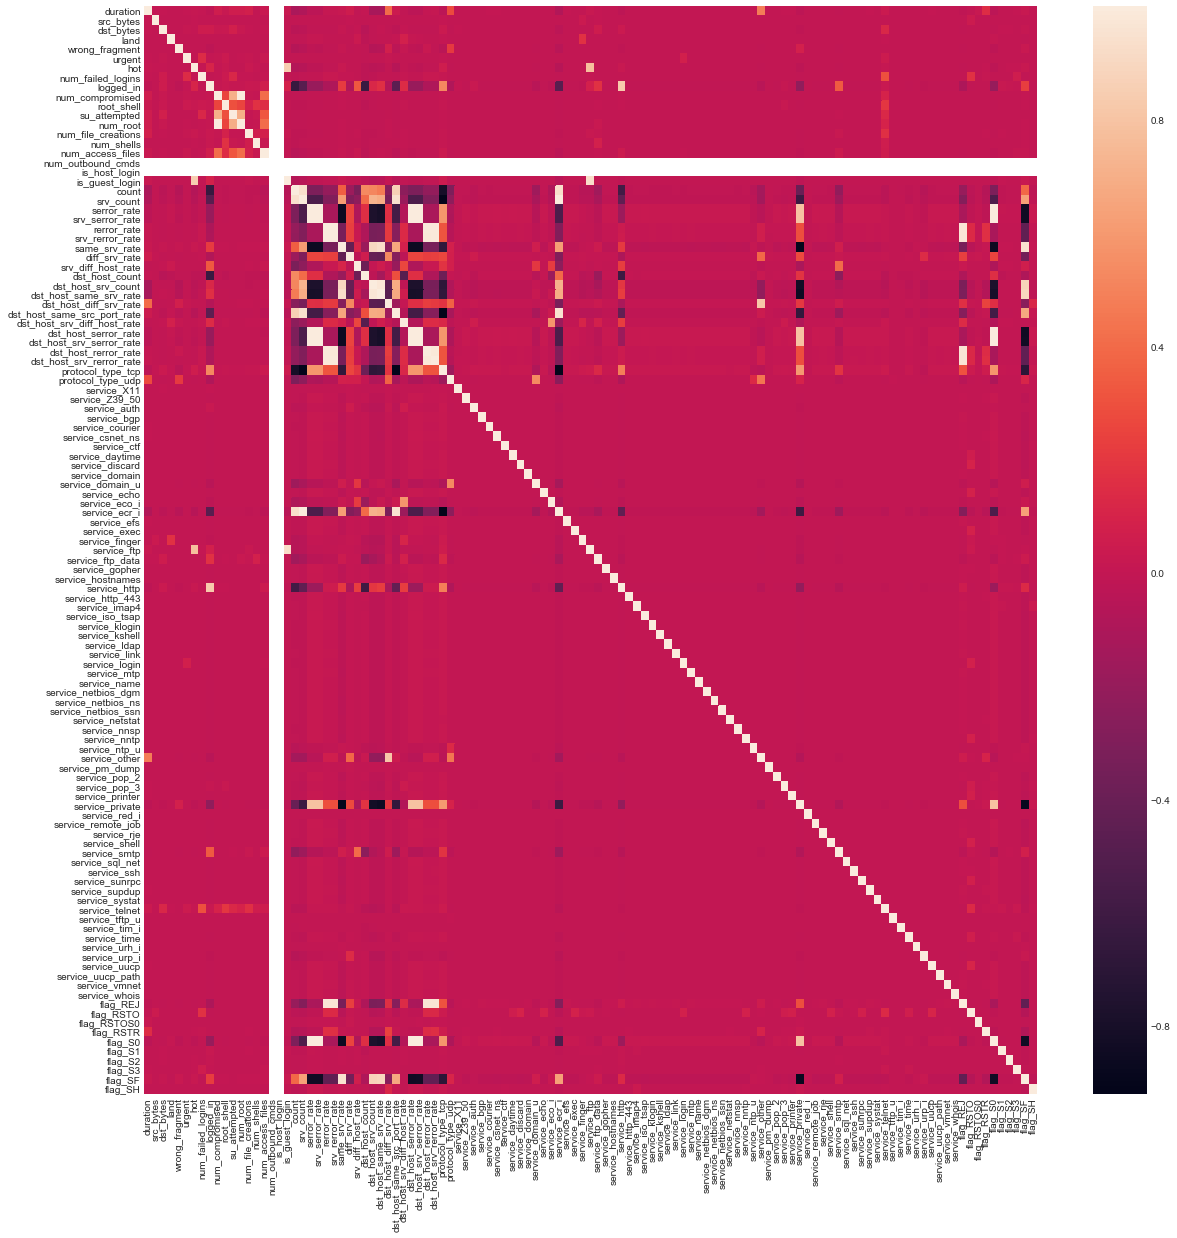

In [44]:
f, ax = plt.subplots(figsize=(20, 20))
sns.heatmap(corr, xticklabels=corr.columns.values, yticklabels=corr.columns.values, ax=ax)

In [45]:
# Toma mucho tiempo y blqouea la interface
# pd.plotting.scatter_matrix(ataques, alpha = 0.3, figsize = (14,8), diagonal = 'kde')

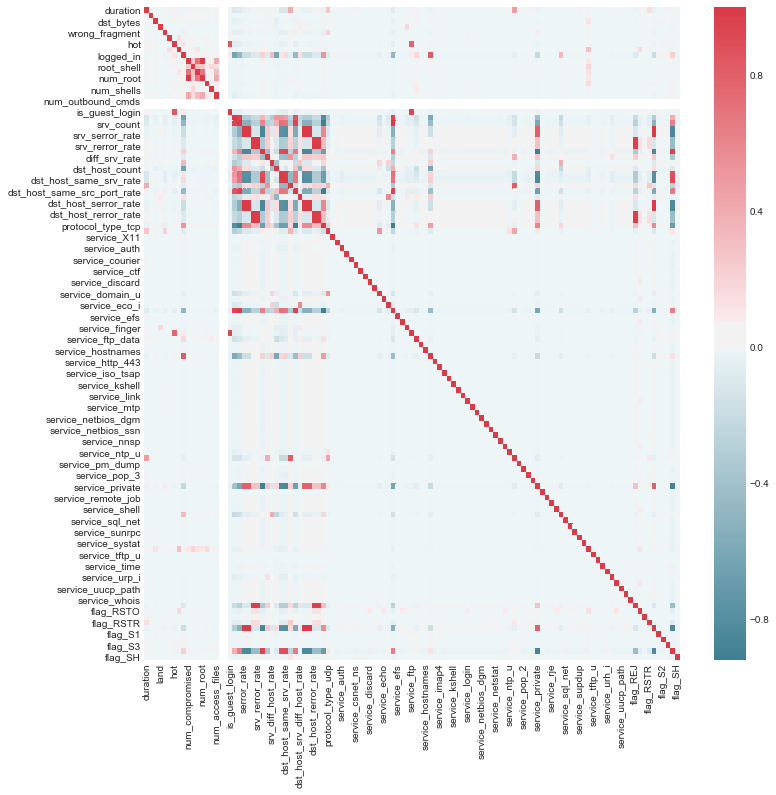

In [46]:
#import seaborn as sns
f, ax = plt.subplots(figsize=(12, 12))
#corr = ataques.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=False, ax=ax)

## Selección de las mejores variables
Source: http://scikit-learn.org/stable/modules/feature_selection.html

### Univariate Selection
Statistical tests can be used to select those features that have the strongest relationship with the output variable.

The scikit-learn library provides the SelectKBest class that can be used with a suite of different statistical tests to select a specific number of features.

The example below uses the chi squared (chi^2) statistical test for non-negative features to select 4 of the best features from the Pima Indians onset of diabetes dataset.

In [47]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
t0 = time()
# feature extraction
test = SelectKBest(score_func=chi2, k=10)
fit = test.fit(X_train, y_train)
# summarize scores
#numpy.set_printoptions(precision=3)
print(fit.scores_)
features = fit.transform(X_train)
# summarize selected features
print(features[0:11,:])
print("Tiempo total: %.2fs" % (time() - t0))

[  1.29915964e+08   4.32120873e+10   2.46220574e+11   3.70499000e+05
   1.03808842e+06   1.08507487e+05   1.66849882e+06   2.63785496e+05
   2.15444381e+05   1.95517181e+05   1.54574245e+05   1.32799234e+04
   1.39334665e+05   7.67193233e+04   4.96529382e+04   7.42821236e+03
              nan              nan   5.37854568e+04   4.91428616e+07
   7.64391646e+07   2.32620174e+05   2.32805502e+05   5.96139965e+04
   5.92478030e+04   6.91334671e+04   5.72070500e+04   5.13029072e+04
   3.19686325e+06   1.89966527e+07   7.34409365e+04   5.59606801e+04
   1.32214671e+05   5.66574177e+04   2.32538064e+05   2.33097545e+05
   5.75018421e+04   5.94168511e+04   1.95661029e+05   7.16708366e+04
   1.69469878e+02   2.63354304e+02   4.36079359e+02   3.03037829e+02
   3.21075795e+02   3.69284963e+02   2.73456430e+02   2.67653365e+02
   3.21075795e+02   2.51270678e+02   1.80804813e+04   2.81764798e+02
   2.43057242e+05   1.59058171e+05   2.81764798e+02   2.95822643e+02
   1.10922839e+04   4.60359453e+04

### Recursive Feature Elimination
The Recursive Feature Elimination (or RFE) works by recursively removing attributes and building a model on those attributes that remain.

It uses the model accuracy to identify which attributes (and combination of attributes) contribute the most to predicting the target attribute.

You can learn more about the RFE class in the scikit-learn documentation.

The example below uses RFE with the logistic regression algorithm to select the top 3 features. The choice of algorithm does not matter too much as long as it is skillful and consistent.

In [48]:
# OJO!!! Este metodo no se puede procesar por que toma demasiado tiempo

# from sklearn.feature_selection import RFE
# from sklearn.linear_model import LogisticRegression

# t0 = time()
# # feature extraction
# model = LogisticRegression() # Esto no puede utilizarse por que es un problema de clasificación no de regresión
# rfe = RFE(model, 10)
# fit = rfe.fit(X_train, y_train)

# #estimator = SVR(kernel="linear")
# #selector = RFE(estimator, 5, step=1)
# #fit = selector.fit(X_train, y_train)

# print("Num Features: %d") % fit.n_features_
# print("Selected Features: %s") % fit.support_
# print("Feature Ranking: %s") % fit.ranking_
# print("Tiempo total: %.2fs" % (time() - t0))

In [49]:
# from sklearn.svm import LinearSVC
# from sklearn.svm import SVC
# from sklearn.feature_selection import RFE
# from sklearn.linear_model import LogisticRegression
# from sklearn.preprocessing import RobustScaler

# scaler = RobustScaler()
# X_scaled = scaler.fit_transform(X_train)

# t0 = time()
# # feature extraction
# #model = LogisticRegression() 
# #rfe = RFE(model, 4)
# #fit = rfe.fit(X_scaled, y_train)

# estimator = SVC(kernel="linear")  # SVR para regresión
# #estimator = LinearSVC(kernel="linear") # LinearSVR para regresión
# selector = RFE(estimator, 5, step=1)
# fit = selector.fit(X_scaled, y_train)

# print("Num Features: %d") % fit.n_features_
# print("Selected Features: %s") % fit.support_
# print("Feature Ranking: %s") % fit.ranking_
# print("Tiempo total: %.2fs" % (time() - t0))


In [50]:
# Tambien toma demasiado tiempo hacer esto
# from sklearn.feature_selection import RFECV
# from sklearn.svm import SVC

# t0 = time()
# estimator = SVC(kernel="linear")
# rfecv = RFECV(estimator, step=1, cv=5, n_jobs=-1)
# selector = rfecv.fit(data, y)
# print(selector.support_)
# print(selector.ranking_)

# print("Tiempo total: %.2fs" % (time() - t0))

These are marked True in the support_ array and marked with a choice “1” in the ranking_ array

### Feature Importance

Bagged decision trees like Random Forest and Extra Trees can be used to estimate the importance of features.

In the example below we construct a ExtraTreesClassifier classifier for the Pima Indians onset of diabetes dataset. You can learn more about the ExtraTreesClassifier class in the scikit-learn API.

In [51]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectFromModel

t0 = time()
print(X_train.shape)

clf = ExtraTreesClassifier(n_jobs=-1)
clf = clf.fit(X_train, y_train)
#clf.feature_importances_
print(clf.feature_importances_)

model = SelectFromModel(clf, prefit=True)
Xr_new = model.transform(X_train)
print(Xr_new.shape)        

print("Tiempo total: %.2fs" % (time() - t0))


(370515, 115)
[  2.78614580e-04   5.48128365e-03   4.94922032e-04   2.03954487e-05
   3.89455534e-03   6.73012636e-06   4.16643121e-03   6.55108798e-05
   4.48531551e-02   2.05652707e-03   7.60815265e-05   3.38521543e-06
   3.43089961e-05   3.10559316e-05   1.29432436e-05   2.28560880e-05
   0.00000000e+00   0.00000000e+00   2.14723548e-04   3.89534034e-02
   6.29186573e-02   3.61661425e-02   6.42015825e-02   8.65453563e-03
   1.37944525e-03   2.93580832e-02   2.88452481e-03   9.36392434e-04
   3.90697611e-02   5.20535323e-02   7.04442354e-02   4.60051526e-03
   2.23876070e-01   1.28947638e-03   5.96112356e-04   2.42064430e-04
   7.00586965e-03   7.40324184e-03   5.66237453e-02   1.27578311e-02
   4.29292137e-06   0.00000000e+00   7.62110689e-06   1.99022639e-10
   3.40353756e-08   2.61416163e-13   2.02364521e-09   8.01292712e-07
   2.60091233e-08   3.95649633e-07   4.98228389e-03   1.13056221e-07
   2.80311766e-03   1.36800044e-01   0.00000000e+00   7.26555130e-09
   3.46700093e-05   

You can see that we are given an importance score for each attribute where the larger score the more important the attribute. 

### Feature importances with forests of trees

Feature ranking:
1. srv_count - [feature 20] (0.113198)
2. service_ecr_i - [feature 53] (0.109991)
3. dst_host_same_src_port_rate - [feature 32] (0.098391)
4. count - [feature 19] (0.085514)
5. protocol_type_tcp - [feature 38] (0.072471)
6. same_srv_rate - [feature 25] (0.059727)
7. flag_SF - [feature 113] (0.049567)
8. dst_host_same_srv_rate - [feature 30] (0.042167)
9. dst_host_srv_count - [feature 29] (0.038858)
10. service_private - [feature 84] (0.033897)
11. logged_in - [feature 8] (0.033419)
12. flag_S0 - [feature 109] (0.032842)
13. dst_host_srv_serror_rate - [feature 35] (0.024063)
14. dst_host_count - [feature 28] (0.023053)
15. srv_serror_rate - [feature 22] (0.022764)
16. serror_rate - [feature 21] (0.021604)
17. service_http - [feature 61] (0.021482)
18. dst_host_serror_rate - [feature 34] (0.020899)
19. protocol_type_udp - [feature 39] (0.013293)
20. src_bytes - [feature 1] (0.008304)
21. rerror_rate - [feature 23] (0.007573)
22. flag_REJ - [feature 105] (0.006389)
23. sr

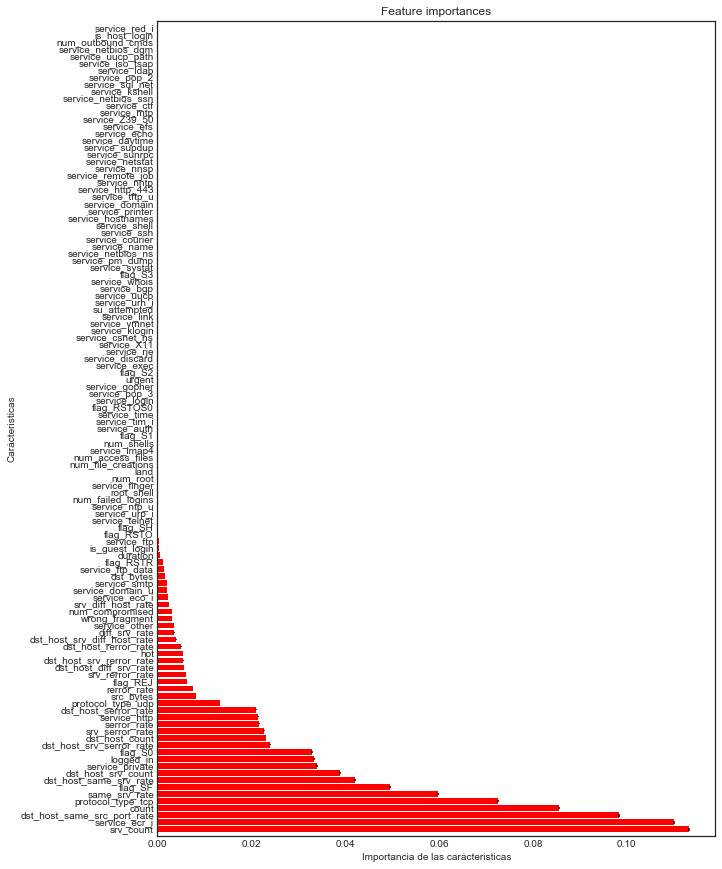

Tiempo total: 45.30s


In [52]:
#import numpy as np
#import matplotlib.pyplot as plt
# from sklearn.ensemble import ExtraTreesClassifier

t0 = time()

# Build a forest and compute the feature importances
forest = ExtraTreesClassifier(n_estimators=250, random_state=0, n_jobs=-1)

forest.fit(X_train, y_train)
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_], axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")
for f in range(30): # X_train.shape[1]
    print("%d. %s - [feature %d] (%f)" % (f + 1, X_train.columns[indices[f]], indices[f], importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure(figsize=(10,15))
plt.title("Feature importances")
plt.barh(range(X_train.shape[1]), importances[indices], color="r", yerr=std[indices], align="center")
#plt.xticks(range(X_train.shape[1]), indices)
plt.yticks(range(X_train.shape[1]), X_train.columns[indices])
plt.xlabel("Importancia de las carácteristicas")
plt.ylabel("Carácteristicas")
plt.ylim([-1, X_train.shape[1]])
plt.show()

print("Tiempo total: %.2fs" % (time() - t0))


In [113]:
X_train.columns[indices][:40]

Index(['srv_count', 'service_ecr_i', 'dst_host_same_src_port_rate', 'count',
       'protocol_type_tcp', 'same_srv_rate', 'flag_SF',
       'dst_host_same_srv_rate', 'dst_host_srv_count', 'service_private',
       'logged_in', 'flag_S0', 'dst_host_srv_serror_rate', 'dst_host_count',
       'srv_serror_rate', 'serror_rate', 'service_http',
       'dst_host_serror_rate', 'protocol_type_udp', 'src_bytes', 'rerror_rate',
       'flag_REJ', 'srv_rerror_rate', 'dst_host_diff_srv_rate',
       'dst_host_srv_rerror_rate', 'hot', 'dst_host_rerror_rate',
       'dst_host_srv_diff_host_rate', 'diff_srv_rate', 'service_other',
       'wrong_fragment', 'num_compromised', 'srv_diff_host_rate',
       'service_eco_i', 'service_domain_u', 'service_smtp', 'dst_bytes',
       'service_ftp_data', 'flag_RSTR', 'duration'],
      dtype='object')

In [54]:
X_selected = X_train[X_train.columns[indices][:30]]
X_selected.head()

,srv_count,service_ecr_i,dst_host_same_src_port_rate,count,protocol_type_tcp,same_srv_rate,flag_SF,dst_host_same_srv_rate,dst_host_srv_count,service_private,...,rerror_rate,flag_REJ,srv_rerror_rate,dst_host_diff_srv_rate,dst_host_srv_rerror_rate,hot,dst_host_rerror_rate,dst_host_srv_diff_host_rate,diff_srv_rate,service_other
96093,511,1,1.00,511,0,1.00,1,1.00,255,0,...,0.0,0,0.0,0.00,0.0,0,0.0,0.0,0.00,0
146265,1,0,0.08,1,1,1.00,1,0.23,3,0,...,0.0,0,0.0,0.54,0.0,0,0.0,0.0,0.00,0
463553,13,0,0.00,285,1,0.05,0,0.05,13,1,...,1.0,1,1.0,0.07,1.0,0,1.0,0.0,0.06,0
407216,477,1,1.00,477,0,1.00,1,1.00,255,0,...,0.0,0,0.0,0.00,0.0,0,0.0,0.0,0.00,0
382965,18,0,0.00,281,1,0.06,0,0.07,18,1,...,0.0,0,0.0,0.05,0.0,0,0.0,0.0,0.05,0


### Guardamos los resultados en el disco

In [112]:
# Guardamos un archivo CSV con las 15 variables mas importantes
feature_selected = pd.concat([X_train[X_train.columns[indices][:40]], y_train], axis=1)
feature_selected_small = pd.concat([X_train[X_train.columns[indices][:15]], y_train], axis=1)
feature_selected.to_csv('data/kddcup.data10p_preprocessed.csv', 
                                              sep=',', decimal='.', header=True, index=False)
feature_selected_small.to_csv('data/kddcup.data10p_preprocessed_15var.csv', 
                                              sep=',', decimal='.', header=True, index=False)

In [55]:
X_selected_scaled = scale(X_selected)
X_selected_scaled[10,:]

array([ 0.88585409,  0.86960432,  0.82719074,  0.83881937, -0.79078683,
        0.53703213,  0.55292361,  0.59944381,  0.62574806, -0.53842862,
       -0.41680534, -0.46227375, -0.46311521,  0.3482692 , -0.46347808,
       -0.46407498, -0.38680493, -0.46435077, -0.20790677, -0.00988075,
       -0.24841913, -0.24035618, -0.24910277, -0.28281702, -0.24998058,
       -0.04415861, -0.25258243, -0.15930175, -0.25587395, -0.12209262])

In [56]:
# Histogram
#X_selected[['srv_count', 'service_ecr_i', 'dst_host_same_src_port_rate', 'count',
#       'protocol_type_tcp', 'same_srv_rate', 'flag_SF']].hist()
#plt.show()

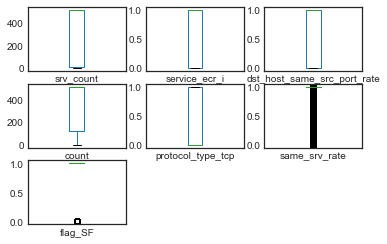

In [57]:
# kind='box', kind='density', kind='box'
X_selected[['srv_count', 'service_ecr_i', 'dst_host_same_src_port_rate', 'count',
       'protocol_type_tcp', 'same_srv_rate', 'flag_SF']].plot(kind='box', 
        subplots=True, layout=(3,3), sharex=False, sharey=False)
plt.show()

In [58]:
# Esto toma mucho tiempo en graficar por la cantidad de datos
#from pandas.plotting import scatter_matrix
#scatter_matrix(X_selected)
#plt.show()

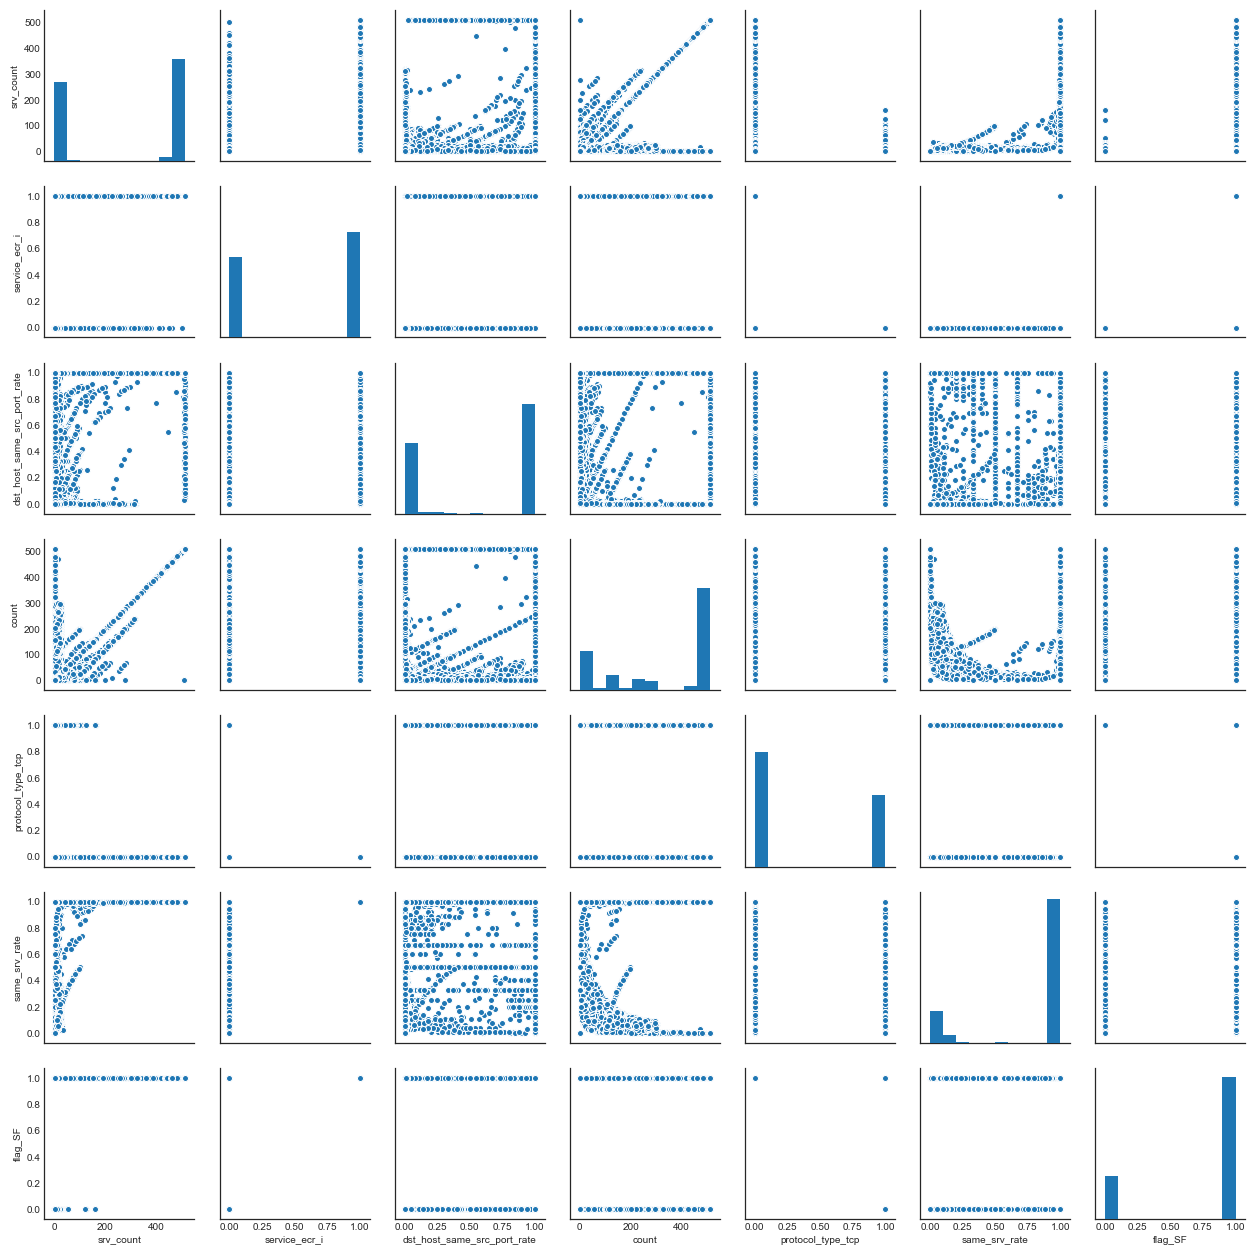

In [55]:
sns.pairplot(X_selected[['srv_count', 'service_ecr_i', 'dst_host_same_src_port_rate', 'count',
       'protocol_type_tcp', 'same_srv_rate', 'flag_SF']][100:])

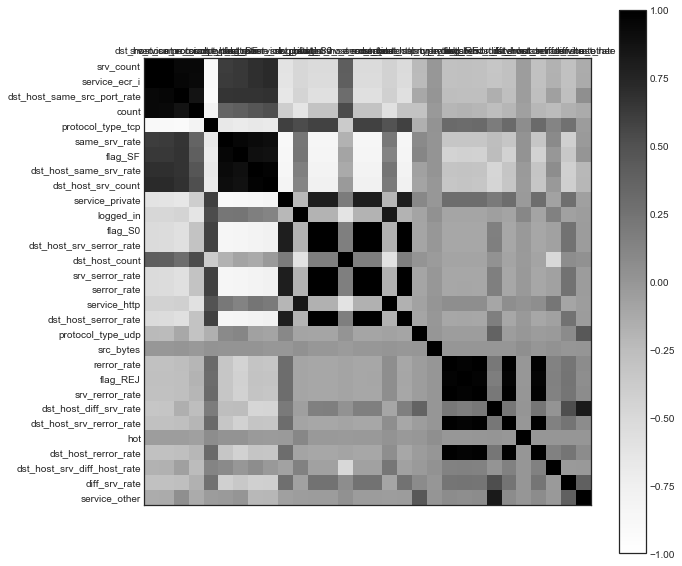

In [64]:
correlations = X_selected.corr()
# plot correlation matrix
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)
cax = ax.matshow(correlations, vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,30,1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(X_selected.columns)
ax.set_yticklabels(X_selected.columns)
plt.show()

#### Selección de variables por medio de otro metodo
OJO!!! Esto toma bastante tiempo aprox. 2h

In [97]:
#from sklearn import datasets
#import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn import cross_validation
from sklearn.metrics import confusion_matrix

def get_enhanced_confusion_matrix(actuals, predictions, labels):
    """"enhances confusion_matrix by adding sensivity and specificity metrics"""
    cm = confusion_matrix(actuals, predictions, labels = labels)
    sensitivity = float(cm[1][1]) / float(cm[1][0]+cm[1][1])
    specificity = float(cm[0][0]) / float(cm[0][0]+cm[0][1])
    weightedAccuracy = (sensitivity * 0.9) + (specificity * 0.1)
    return cm, sensitivity, specificity, weightedAccuracy

#iris = datasets.load_iris()
#x=pd.DataFrame(iris.data, columns=['var1','var2','var3', 'var4'])
#y=pd.Series(iris.target, name='target')

x = X_train
y = y_train

response, _  = pandas.factorize(y)

xTrain, xTest, yTrain, yTest = cross_validation.train_test_split(x, response, test_size = .25, random_state = 36583)
print ("building the first forest")
rf = RandomForestClassifier(n_estimators = 250, min_samples_split = 2, n_jobs = -1, verbose = 1)
rf.fit(xTrain, yTrain)
importances = pd.DataFrame({'name':x.columns,'imp':rf.feature_importances_}).sort_values(['imp'], ascending = False).reset_index(drop = True)

cm, sensitivity, specificity, weightedAccuracy = get_enhanced_confusion_matrix(yTest, rf.predict(xTest), [0,1])
numFeatures = len(x.columns)

rfeMatrix = pandas.DataFrame({'numFeatures':[numFeatures], 
                              'weightedAccuracy':[weightedAccuracy], 
                              'sensitivity':[sensitivity], 
                              'specificity':[specificity]})

print ("running RFE on  %d features"%numFeatures)

for i in range(1,numFeatures,1):
    varsUsed = importances['name'][0:i]
    print ("now using %d of %s features"%(len(varsUsed), numFeatures))
    xTrain, xTest, yTrain, yTest = cross_validation.train_test_split(x[varsUsed], response, test_size = .25)
    rf = RandomForestClassifier(n_estimators = 250, min_samples_split = 2, n_jobs = -1, verbose = 1)
    rf.fit(xTrain, yTrain)
    cm, sensitivity, specificity, weightedAccuracy = get_enhanced_confusion_matrix(yTest, rf.predict(xTest), [0,1])
    print("\n"+str(cm))
    print('the sensitivity is %d percent'%(sensitivity * 100))
    print('the specificity is %d percent'%(specificity * 100))
    print('the weighted accuracy is %d percent'%(weightedAccuracy * 100))
    rfeMatrix = rfeMatrix.append(
                                pd.DataFrame({'numFeatures':[len(varsUsed)], 
                                'weightedAccuracy':[weightedAccuracy], 
                                'sensitivity':[sensitivity], 
                                'specificity':[specificity]}), ignore_index = True)    
print("\n"+str(rfeMatrix))    
maxAccuracy = rfeMatrix.weightedAccuracy.max()
maxAccuracyFeatures = min(rfeMatrix.numFeatures[rfeMatrix.weightedAccuracy == maxAccuracy])
featuresUsed = importances['name'][0:maxAccuracyFeatures].tolist()

print ("the final features used are %s"%featuresUsed)

building the first forest


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    4.9s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   20.7s
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:   26.9s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.6s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    2.4s
[Parallel(n_jobs=4)]: Done 250 out of 250 | elapsed:    3.1s finished


running RFE on  115 features
now using 1 of 115 features


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    3.0s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   13.5s
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:   17.3s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.5s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    2.1s
[Parallel(n_jobs=4)]: Done 250 out of 250 | elapsed:    2.7s finished



[[52705    51]
 [   19 10244]]
the sensitivity is 99 percent
the specificity is 99 percent
the weighted accuracy is 99 percent
now using 2 of 115 features


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    3.3s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   15.1s
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:   19.6s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.5s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    2.4s
[Parallel(n_jobs=4)]: Done 250 out of 250 | elapsed:    3.0s finished



[[52508    54]
 [   19 18305]]
the sensitivity is 99 percent
the specificity is 99 percent
the weighted accuracy is 99 percent
now using 3 of 115 features


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    3.2s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   14.8s
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:   18.8s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.5s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    2.4s
[Parallel(n_jobs=4)]: Done 250 out of 250 | elapsed:    3.0s finished



[[52563     5]
 [    0 18175]]
the sensitivity is 100 percent
the specificity is 99 percent
the weighted accuracy is 99 percent
now using 4 of 115 features


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    3.5s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   15.5s
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:   20.3s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.5s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    2.3s
[Parallel(n_jobs=4)]: Done 250 out of 250 | elapsed:    2.9s finished



[[52580     1]
 [    0 18269]]
the sensitivity is 100 percent
the specificity is 99 percent
the weighted accuracy is 99 percent
now using 5 of 115 features


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    3.4s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   14.3s
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:   18.6s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.5s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    2.3s
[Parallel(n_jobs=4)]: Done 250 out of 250 | elapsed:    2.9s finished



[[52707     0]
 [    0 18139]]
the sensitivity is 100 percent
the specificity is 100 percent
the weighted accuracy is 100 percent
now using 6 of 115 features


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    3.1s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   13.8s
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:   18.3s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.5s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    2.3s
[Parallel(n_jobs=4)]: Done 250 out of 250 | elapsed:    3.0s finished



[[52815     0]
 [    0 18014]]
the sensitivity is 100 percent
the specificity is 100 percent
the weighted accuracy is 100 percent
now using 7 of 115 features


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    3.5s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   14.6s
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:   19.1s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.5s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    2.2s
[Parallel(n_jobs=4)]: Done 250 out of 250 | elapsed:    2.9s finished



[[52674     0]
 [    0 18091]]
the sensitivity is 100 percent
the specificity is 100 percent
the weighted accuracy is 100 percent
now using 8 of 115 features


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    3.2s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   14.5s
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:   19.2s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.5s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    2.3s
[Parallel(n_jobs=4)]: Done 250 out of 250 | elapsed:    3.0s finished



[[52658     0]
 [    0 18399]]
the sensitivity is 100 percent
the specificity is 100 percent
the weighted accuracy is 100 percent
now using 9 of 115 features


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    4.0s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   16.9s
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:   21.9s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.5s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    2.2s
[Parallel(n_jobs=4)]: Done 250 out of 250 | elapsed:    2.9s finished



[[52381     0]
 [    0 18171]]
the sensitivity is 100 percent
the specificity is 100 percent
the weighted accuracy is 100 percent
now using 10 of 115 features


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    3.8s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   16.2s
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:   20.6s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.5s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    2.2s
[Parallel(n_jobs=4)]: Done 250 out of 250 | elapsed:    2.8s finished



[[52756     0]
 [    0 18235]]
the sensitivity is 100 percent
the specificity is 100 percent
the weighted accuracy is 100 percent
now using 11 of 115 features


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    3.4s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   14.9s
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:   19.5s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.5s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    2.2s
[Parallel(n_jobs=4)]: Done 250 out of 250 | elapsed:    2.9s finished



[[52723     0]
 [    0 18085]]
the sensitivity is 100 percent
the specificity is 100 percent
the weighted accuracy is 100 percent
now using 12 of 115 features


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    3.6s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   15.4s
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:   19.9s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.5s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    2.2s
[Parallel(n_jobs=4)]: Done 250 out of 250 | elapsed:    2.9s finished



[[52512     0]
 [    0 18358]]
the sensitivity is 100 percent
the specificity is 100 percent
the weighted accuracy is 100 percent
now using 13 of 115 features


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    3.5s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   15.6s
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:   20.1s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.5s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    2.2s
[Parallel(n_jobs=4)]: Done 250 out of 250 | elapsed:    2.8s finished



[[52691     0]
 [    0 18253]]
the sensitivity is 100 percent
the specificity is 100 percent
the weighted accuracy is 100 percent
now using 14 of 115 features


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    3.5s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   15.2s
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:   19.6s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.5s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    2.2s
[Parallel(n_jobs=4)]: Done 250 out of 250 | elapsed:    2.8s finished



[[52758     0]
 [    0 18235]]
the sensitivity is 100 percent
the specificity is 100 percent
the weighted accuracy is 100 percent
now using 15 of 115 features


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    3.4s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   15.4s
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:   19.9s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.5s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    2.1s
[Parallel(n_jobs=4)]: Done 250 out of 250 | elapsed:    2.7s finished



[[52753     0]
 [    0 18298]]
the sensitivity is 100 percent
the specificity is 100 percent
the weighted accuracy is 100 percent
now using 16 of 115 features


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    4.3s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   17.5s
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:   22.7s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.5s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    2.2s
[Parallel(n_jobs=4)]: Done 250 out of 250 | elapsed:    2.9s finished



[[52614     0]
 [    0 18192]]
the sensitivity is 100 percent
the specificity is 100 percent
the weighted accuracy is 100 percent
now using 17 of 115 features


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    3.9s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   17.4s
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:   22.5s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.5s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    2.2s
[Parallel(n_jobs=4)]: Done 250 out of 250 | elapsed:    2.8s finished



[[52574     0]
 [    0 18065]]
the sensitivity is 100 percent
the specificity is 100 percent
the weighted accuracy is 100 percent
now using 18 of 115 features


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    3.9s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   16.9s
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:   22.4s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.8s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    3.4s
[Parallel(n_jobs=4)]: Done 250 out of 250 | elapsed:    4.2s finished



[[52482     0]
 [    0 18364]]
the sensitivity is 100 percent
the specificity is 100 percent
the weighted accuracy is 100 percent
now using 19 of 115 features


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    4.1s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   21.3s
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:   26.2s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.5s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    2.3s
[Parallel(n_jobs=4)]: Done 250 out of 250 | elapsed:    3.0s finished



[[52635     0]
 [    0 18353]]
the sensitivity is 100 percent
the specificity is 100 percent
the weighted accuracy is 100 percent
now using 20 of 115 features


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    3.9s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   17.0s
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:   22.1s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.5s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    2.3s
[Parallel(n_jobs=4)]: Done 250 out of 250 | elapsed:    2.9s finished



[[52784     0]
 [    0 18122]]
the sensitivity is 100 percent
the specificity is 100 percent
the weighted accuracy is 100 percent
now using 21 of 115 features


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    3.9s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   18.4s
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:   25.5s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.6s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    2.3s
[Parallel(n_jobs=4)]: Done 250 out of 250 | elapsed:    3.0s finished



[[52527     0]
 [    0 18512]]
the sensitivity is 100 percent
the specificity is 100 percent
the weighted accuracy is 100 percent
now using 22 of 115 features


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    4.2s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   21.4s
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:   26.4s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.5s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    2.3s
[Parallel(n_jobs=4)]: Done 250 out of 250 | elapsed:    3.0s finished



[[52699     0]
 [    0 18322]]
the sensitivity is 100 percent
the specificity is 100 percent
the weighted accuracy is 100 percent
now using 23 of 115 features


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    5.0s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   21.7s
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:   26.8s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.5s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    2.9s
[Parallel(n_jobs=4)]: Done 250 out of 250 | elapsed:    3.7s finished



[[52709     0]
 [    0 18413]]
the sensitivity is 100 percent
the specificity is 100 percent
the weighted accuracy is 100 percent
now using 24 of 115 features


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    4.5s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   18.5s
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:   23.7s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.5s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    2.3s
[Parallel(n_jobs=4)]: Done 250 out of 250 | elapsed:    2.9s finished



[[52821     0]
 [    0 18238]]
the sensitivity is 100 percent
the specificity is 100 percent
the weighted accuracy is 100 percent
now using 25 of 115 features


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    4.3s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   18.8s
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:   24.2s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.5s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    2.3s
[Parallel(n_jobs=4)]: Done 250 out of 250 | elapsed:    2.9s finished



[[52609     0]
 [    0 18172]]
the sensitivity is 100 percent
the specificity is 100 percent
the weighted accuracy is 100 percent
now using 26 of 115 features


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    4.2s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   18.0s
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:   23.3s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.5s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    2.3s
[Parallel(n_jobs=4)]: Done 250 out of 250 | elapsed:    2.9s finished



[[52933     0]
 [    0 18085]]
the sensitivity is 100 percent
the specificity is 100 percent
the weighted accuracy is 100 percent
now using 27 of 115 features


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    4.2s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   18.0s
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:   23.4s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.5s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    2.2s
[Parallel(n_jobs=4)]: Done 250 out of 250 | elapsed:    2.9s finished



[[52493     0]
 [    0 18538]]
the sensitivity is 100 percent
the specificity is 100 percent
the weighted accuracy is 100 percent
now using 28 of 115 features


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    4.1s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   17.9s
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:   23.0s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.5s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    2.2s
[Parallel(n_jobs=4)]: Done 250 out of 250 | elapsed:    2.9s finished



[[52353     0]
 [    0 18365]]
the sensitivity is 100 percent
the specificity is 100 percent
the weighted accuracy is 100 percent
now using 29 of 115 features


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    4.1s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   18.7s
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:   25.4s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.6s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    2.5s
[Parallel(n_jobs=4)]: Done 250 out of 250 | elapsed:    3.4s finished



[[52556     0]
 [    0 18289]]
the sensitivity is 100 percent
the specificity is 100 percent
the weighted accuracy is 100 percent
now using 30 of 115 features


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    4.5s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   18.4s
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:   23.6s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.5s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    2.3s
[Parallel(n_jobs=4)]: Done 250 out of 250 | elapsed:    3.0s finished



[[52860     0]
 [    0 18091]]
the sensitivity is 100 percent
the specificity is 100 percent
the weighted accuracy is 100 percent
now using 31 of 115 features


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    4.3s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   18.3s
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:   23.8s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.6s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    2.4s
[Parallel(n_jobs=4)]: Done 250 out of 250 | elapsed:    3.1s finished



[[52575     0]
 [    0 18237]]
the sensitivity is 100 percent
the specificity is 100 percent
the weighted accuracy is 100 percent
now using 32 of 115 features


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    4.0s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   18.2s
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:   23.9s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.5s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    2.4s
[Parallel(n_jobs=4)]: Done 250 out of 250 | elapsed:    3.1s finished



[[52614     0]
 [    0 18363]]
the sensitivity is 100 percent
the specificity is 100 percent
the weighted accuracy is 100 percent
now using 33 of 115 features


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    4.0s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   18.6s
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:   24.0s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.5s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    2.3s
[Parallel(n_jobs=4)]: Done 250 out of 250 | elapsed:    3.0s finished



[[52819     0]
 [    0 18038]]
the sensitivity is 100 percent
the specificity is 100 percent
the weighted accuracy is 100 percent
now using 34 of 115 features


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    4.0s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   18.1s
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:   23.2s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.5s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    2.2s
[Parallel(n_jobs=4)]: Done 250 out of 250 | elapsed:    2.9s finished



[[52556     0]
 [    0 18278]]
the sensitivity is 100 percent
the specificity is 100 percent
the weighted accuracy is 100 percent
now using 35 of 115 features


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    4.1s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   17.3s
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:   22.3s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.5s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    2.3s
[Parallel(n_jobs=4)]: Done 250 out of 250 | elapsed:    2.9s finished



[[52658     0]
 [    0 18211]]
the sensitivity is 100 percent
the specificity is 100 percent
the weighted accuracy is 100 percent
now using 36 of 115 features


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    4.4s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   19.7s
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:   25.5s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.5s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    2.3s
[Parallel(n_jobs=4)]: Done 250 out of 250 | elapsed:    3.0s finished



[[52797     0]
 [    0 18237]]
the sensitivity is 100 percent
the specificity is 100 percent
the weighted accuracy is 100 percent
now using 37 of 115 features


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    4.5s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   19.7s
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:   25.4s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.5s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    2.3s
[Parallel(n_jobs=4)]: Done 250 out of 250 | elapsed:    2.9s finished



[[52908     0]
 [    0 18122]]
the sensitivity is 100 percent
the specificity is 100 percent
the weighted accuracy is 100 percent
now using 38 of 115 features


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    4.4s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   19.6s
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:   25.2s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.5s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    2.4s
[Parallel(n_jobs=4)]: Done 250 out of 250 | elapsed:    3.1s finished



[[52487     0]
 [    0 18393]]
the sensitivity is 100 percent
the specificity is 100 percent
the weighted accuracy is 100 percent
now using 39 of 115 features


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    4.4s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   19.5s
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:   25.1s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.5s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    2.3s
[Parallel(n_jobs=4)]: Done 250 out of 250 | elapsed:    3.0s finished



[[52789     0]
 [    0 18254]]
the sensitivity is 100 percent
the specificity is 100 percent
the weighted accuracy is 100 percent
now using 40 of 115 features


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    4.3s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   19.5s
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:   25.5s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.5s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    2.5s
[Parallel(n_jobs=4)]: Done 250 out of 250 | elapsed:    3.2s finished



[[52928     0]
 [    0 18122]]
the sensitivity is 100 percent
the specificity is 100 percent
the weighted accuracy is 100 percent
now using 41 of 115 features


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    4.5s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   19.5s
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:   25.3s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.6s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    2.3s
[Parallel(n_jobs=4)]: Done 250 out of 250 | elapsed:    3.0s finished



[[52768     0]
 [    0 18218]]
the sensitivity is 100 percent
the specificity is 100 percent
the weighted accuracy is 100 percent
now using 42 of 115 features


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    4.3s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   19.3s
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:   24.7s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.6s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    2.3s
[Parallel(n_jobs=4)]: Done 250 out of 250 | elapsed:    3.0s finished



[[52689     0]
 [    0 18162]]
the sensitivity is 100 percent
the specificity is 100 percent
the weighted accuracy is 100 percent
now using 43 of 115 features


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    4.2s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   18.4s
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:   23.8s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.5s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    2.2s
[Parallel(n_jobs=4)]: Done 250 out of 250 | elapsed:    2.9s finished



[[52653     0]
 [    0 18120]]
the sensitivity is 100 percent
the specificity is 100 percent
the weighted accuracy is 100 percent
now using 44 of 115 features


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    4.2s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   19.0s
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:   24.5s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.6s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    2.3s
[Parallel(n_jobs=4)]: Done 250 out of 250 | elapsed:    3.0s finished



[[52780     0]
 [    0 18061]]
the sensitivity is 100 percent
the specificity is 100 percent
the weighted accuracy is 100 percent
now using 45 of 115 features


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    4.2s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   19.0s
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:   25.4s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.5s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    2.6s
[Parallel(n_jobs=4)]: Done 250 out of 250 | elapsed:    3.3s finished



[[52688     0]
 [    0 18225]]
the sensitivity is 100 percent
the specificity is 100 percent
the weighted accuracy is 100 percent
now using 46 of 115 features


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    4.3s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   19.7s
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:   26.4s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.5s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    2.4s
[Parallel(n_jobs=4)]: Done 250 out of 250 | elapsed:    3.2s finished



[[52583     0]
 [    0 18115]]
the sensitivity is 100 percent
the specificity is 100 percent
the weighted accuracy is 100 percent
now using 47 of 115 features


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    4.6s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   18.9s
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:   24.2s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.5s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    2.2s
[Parallel(n_jobs=4)]: Done 250 out of 250 | elapsed:    2.8s finished



[[52534     0]
 [    0 18413]]
the sensitivity is 100 percent
the specificity is 100 percent
the weighted accuracy is 100 percent
now using 48 of 115 features


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    4.2s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   17.9s
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:   23.3s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.5s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    2.3s
[Parallel(n_jobs=4)]: Done 250 out of 250 | elapsed:    2.9s finished



[[52686     0]
 [    0 18000]]
the sensitivity is 100 percent
the specificity is 100 percent
the weighted accuracy is 100 percent
now using 49 of 115 features


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    4.5s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   19.6s
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:   25.4s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.5s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    2.2s
[Parallel(n_jobs=4)]: Done 250 out of 250 | elapsed:    2.8s finished



[[52458     0]
 [    0 18204]]
the sensitivity is 100 percent
the specificity is 100 percent
the weighted accuracy is 100 percent
now using 50 of 115 features


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    4.5s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   19.9s
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:   25.7s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.5s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    2.3s
[Parallel(n_jobs=4)]: Done 250 out of 250 | elapsed:    3.0s finished



[[52693     0]
 [    0 18273]]
the sensitivity is 100 percent
the specificity is 100 percent
the weighted accuracy is 100 percent
now using 51 of 115 features


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    4.6s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   19.6s
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:   25.2s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.5s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    2.3s
[Parallel(n_jobs=4)]: Done 250 out of 250 | elapsed:    2.9s finished



[[52586     0]
 [    0 18114]]
the sensitivity is 100 percent
the specificity is 100 percent
the weighted accuracy is 100 percent
now using 52 of 115 features


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    4.4s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   19.0s
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:   24.7s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.5s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    2.3s
[Parallel(n_jobs=4)]: Done 250 out of 250 | elapsed:    3.0s finished



[[52672     0]
 [    0 18203]]
the sensitivity is 100 percent
the specificity is 100 percent
the weighted accuracy is 100 percent
now using 53 of 115 features


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    4.5s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   19.4s
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:   24.9s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.5s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    2.3s
[Parallel(n_jobs=4)]: Done 250 out of 250 | elapsed:    2.9s finished



[[52874     0]
 [    0 18144]]
the sensitivity is 100 percent
the specificity is 100 percent
the weighted accuracy is 100 percent
now using 54 of 115 features


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    4.5s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   19.2s
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:   24.8s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.5s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    2.3s
[Parallel(n_jobs=4)]: Done 250 out of 250 | elapsed:    2.9s finished



[[52716     0]
 [    0 18125]]
the sensitivity is 100 percent
the specificity is 100 percent
the weighted accuracy is 100 percent
now using 55 of 115 features


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    4.4s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   19.0s
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:   24.6s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.5s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    2.3s
[Parallel(n_jobs=4)]: Done 250 out of 250 | elapsed:    2.9s finished



[[52377     0]
 [    0 18398]]
the sensitivity is 100 percent
the specificity is 100 percent
the weighted accuracy is 100 percent
now using 56 of 115 features


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    5.1s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   20.1s
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:   26.2s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.5s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    2.2s
[Parallel(n_jobs=4)]: Done 250 out of 250 | elapsed:    2.8s finished



[[52580     0]
 [    0 18129]]
the sensitivity is 100 percent
the specificity is 100 percent
the weighted accuracy is 100 percent
now using 57 of 115 features


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    4.3s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   19.5s
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:   24.9s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.5s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    2.3s
[Parallel(n_jobs=4)]: Done 250 out of 250 | elapsed:    2.9s finished



[[52712     0]
 [    0 18354]]
the sensitivity is 100 percent
the specificity is 100 percent
the weighted accuracy is 100 percent
now using 58 of 115 features


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    4.5s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   19.5s
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:   25.0s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.5s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    2.3s
[Parallel(n_jobs=4)]: Done 250 out of 250 | elapsed:    3.0s finished



[[52492     0]
 [    0 18139]]
the sensitivity is 100 percent
the specificity is 100 percent
the weighted accuracy is 100 percent
now using 59 of 115 features


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    4.2s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   19.0s
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:   24.6s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.5s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    2.5s
[Parallel(n_jobs=4)]: Done 250 out of 250 | elapsed:    3.1s finished



[[52644     0]
 [    0 18220]]
the sensitivity is 100 percent
the specificity is 100 percent
the weighted accuracy is 100 percent
now using 60 of 115 features


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    4.4s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   19.0s
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:   24.4s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.5s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    2.3s
[Parallel(n_jobs=4)]: Done 250 out of 250 | elapsed:    3.0s finished



[[52593     0]
 [    0 18294]]
the sensitivity is 100 percent
the specificity is 100 percent
the weighted accuracy is 100 percent
now using 61 of 115 features


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    4.1s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   18.3s
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:   23.6s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.5s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    2.3s
[Parallel(n_jobs=4)]: Done 250 out of 250 | elapsed:    3.0s finished



[[52740     0]
 [    0 18178]]
the sensitivity is 100 percent
the specificity is 100 percent
the weighted accuracy is 100 percent
now using 62 of 115 features


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    4.1s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   18.5s
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:   23.8s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.5s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    2.3s
[Parallel(n_jobs=4)]: Done 250 out of 250 | elapsed:    2.9s finished



[[52541     0]
 [    0 18273]]
the sensitivity is 100 percent
the specificity is 100 percent
the weighted accuracy is 100 percent
now using 63 of 115 features


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    4.3s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   18.5s
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:   23.9s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.5s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    2.3s
[Parallel(n_jobs=4)]: Done 250 out of 250 | elapsed:    3.0s finished



[[52690     0]
 [    0 18260]]
the sensitivity is 100 percent
the specificity is 100 percent
the weighted accuracy is 100 percent
now using 64 of 115 features


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    4.4s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   19.7s
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:   25.7s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.5s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    2.3s
[Parallel(n_jobs=4)]: Done 250 out of 250 | elapsed:    3.0s finished



[[52638     0]
 [    0 18193]]
the sensitivity is 100 percent
the specificity is 100 percent
the weighted accuracy is 100 percent
now using 65 of 115 features


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    4.7s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   21.1s
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:   27.2s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.5s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    2.4s
[Parallel(n_jobs=4)]: Done 250 out of 250 | elapsed:    3.1s finished



[[52627     0]
 [    0 18273]]
the sensitivity is 100 percent
the specificity is 100 percent
the weighted accuracy is 100 percent
now using 66 of 115 features


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    4.7s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   20.6s
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:   26.6s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.6s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    2.3s
[Parallel(n_jobs=4)]: Done 250 out of 250 | elapsed:    3.0s finished



[[52841     0]
 [    0 18235]]
the sensitivity is 100 percent
the specificity is 100 percent
the weighted accuracy is 100 percent
now using 67 of 115 features


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    4.5s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   19.8s
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:   25.5s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.6s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    2.4s
[Parallel(n_jobs=4)]: Done 250 out of 250 | elapsed:    3.0s finished



[[52481     0]
 [    0 18310]]
the sensitivity is 100 percent
the specificity is 100 percent
the weighted accuracy is 100 percent
now using 68 of 115 features


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    4.6s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   20.1s
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:   26.1s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.5s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    2.3s
[Parallel(n_jobs=4)]: Done 250 out of 250 | elapsed:    3.0s finished



[[52609     0]
 [    0 18263]]
the sensitivity is 100 percent
the specificity is 100 percent
the weighted accuracy is 100 percent
now using 69 of 115 features


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    4.5s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   19.8s
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:   25.5s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.5s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    2.3s
[Parallel(n_jobs=4)]: Done 250 out of 250 | elapsed:    3.0s finished



[[52448     0]
 [    0 18279]]
the sensitivity is 100 percent
the specificity is 100 percent
the weighted accuracy is 100 percent
now using 70 of 115 features


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    4.3s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   19.6s
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:   25.2s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.5s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    2.2s
[Parallel(n_jobs=4)]: Done 250 out of 250 | elapsed:    2.8s finished



[[52766     0]
 [    0 18240]]
the sensitivity is 100 percent
the specificity is 100 percent
the weighted accuracy is 100 percent
now using 71 of 115 features


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    4.4s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   19.4s
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:   25.1s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.5s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    2.3s
[Parallel(n_jobs=4)]: Done 250 out of 250 | elapsed:    2.9s finished



[[52563     0]
 [    0 18291]]
the sensitivity is 100 percent
the specificity is 100 percent
the weighted accuracy is 100 percent
now using 72 of 115 features


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    4.4s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   19.0s
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:   25.1s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.6s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    2.7s
[Parallel(n_jobs=4)]: Done 250 out of 250 | elapsed:    3.6s finished



[[52680     0]
 [    0 18201]]
the sensitivity is 100 percent
the specificity is 100 percent
the weighted accuracy is 100 percent
now using 73 of 115 features


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    4.6s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   20.8s
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:   26.3s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.5s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    2.3s
[Parallel(n_jobs=4)]: Done 250 out of 250 | elapsed:    3.0s finished



[[52603     0]
 [    0 18291]]
the sensitivity is 100 percent
the specificity is 100 percent
the weighted accuracy is 100 percent
now using 74 of 115 features


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    4.5s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   19.4s
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:   25.3s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.5s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    2.3s
[Parallel(n_jobs=4)]: Done 250 out of 250 | elapsed:    2.9s finished



[[52493     0]
 [    0 18412]]
the sensitivity is 100 percent
the specificity is 100 percent
the weighted accuracy is 100 percent
now using 75 of 115 features


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    4.3s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   19.1s
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:   24.8s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.5s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    2.3s
[Parallel(n_jobs=4)]: Done 250 out of 250 | elapsed:    2.9s finished



[[52729     0]
 [    0 18226]]
the sensitivity is 100 percent
the specificity is 100 percent
the weighted accuracy is 100 percent
now using 76 of 115 features


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    4.5s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   19.6s
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:   25.1s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.5s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    2.3s
[Parallel(n_jobs=4)]: Done 250 out of 250 | elapsed:    2.9s finished



[[52407     0]
 [    0 18231]]
the sensitivity is 100 percent
the specificity is 100 percent
the weighted accuracy is 100 percent
now using 77 of 115 features


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    5.1s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   20.7s
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:   26.4s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.5s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    2.3s
[Parallel(n_jobs=4)]: Done 250 out of 250 | elapsed:    2.9s finished



[[52814     0]
 [    0 18100]]
the sensitivity is 100 percent
the specificity is 100 percent
the weighted accuracy is 100 percent
now using 78 of 115 features


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    4.4s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   19.4s
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:   25.1s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.5s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    2.3s
[Parallel(n_jobs=4)]: Done 250 out of 250 | elapsed:    3.0s finished



[[52656     0]
 [    0 18355]]
the sensitivity is 100 percent
the specificity is 100 percent
the weighted accuracy is 100 percent
now using 79 of 115 features


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    4.5s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   19.3s
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:   25.0s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.5s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    2.2s
[Parallel(n_jobs=4)]: Done 250 out of 250 | elapsed:    2.8s finished



[[52929     0]
 [    0 18119]]
the sensitivity is 100 percent
the specificity is 100 percent
the weighted accuracy is 100 percent
now using 80 of 115 features


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    4.4s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   19.4s
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:   24.8s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.5s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    2.3s
[Parallel(n_jobs=4)]: Done 250 out of 250 | elapsed:    3.0s finished



[[52621     0]
 [    0 18141]]
the sensitivity is 100 percent
the specificity is 100 percent
the weighted accuracy is 100 percent
now using 81 of 115 features


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    5.0s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   21.2s
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:   27.2s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.5s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    2.3s
[Parallel(n_jobs=4)]: Done 250 out of 250 | elapsed:    3.0s finished



[[52673     0]
 [    0 18188]]
the sensitivity is 100 percent
the specificity is 100 percent
the weighted accuracy is 100 percent
now using 82 of 115 features


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    4.6s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   20.0s
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:   25.7s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.5s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    2.2s
[Parallel(n_jobs=4)]: Done 250 out of 250 | elapsed:    2.9s finished



[[52897     0]
 [    0 18163]]
the sensitivity is 100 percent
the specificity is 100 percent
the weighted accuracy is 100 percent
now using 83 of 115 features


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    4.6s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   20.5s
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:   26.6s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.5s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    2.3s
[Parallel(n_jobs=4)]: Done 250 out of 250 | elapsed:    2.9s finished



[[52712     0]
 [    0 18322]]
the sensitivity is 100 percent
the specificity is 100 percent
the weighted accuracy is 100 percent
now using 84 of 115 features


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    4.7s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   20.8s
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:   26.5s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.5s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    2.2s
[Parallel(n_jobs=4)]: Done 250 out of 250 | elapsed:    2.9s finished



[[52675     0]
 [    0 18280]]
the sensitivity is 100 percent
the specificity is 100 percent
the weighted accuracy is 100 percent
now using 85 of 115 features


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    4.4s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   20.3s
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:   26.2s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.5s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    2.3s
[Parallel(n_jobs=4)]: Done 250 out of 250 | elapsed:    3.0s finished



[[52650     0]
 [    0 18256]]
the sensitivity is 100 percent
the specificity is 100 percent
the weighted accuracy is 100 percent
now using 86 of 115 features


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    5.1s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   21.2s
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:   26.8s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.5s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    2.3s
[Parallel(n_jobs=4)]: Done 250 out of 250 | elapsed:    3.0s finished



[[52745     0]
 [    0 18234]]
the sensitivity is 100 percent
the specificity is 100 percent
the weighted accuracy is 100 percent
now using 87 of 115 features


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    5.0s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   20.9s
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:   27.0s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.5s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    2.3s
[Parallel(n_jobs=4)]: Done 250 out of 250 | elapsed:    3.0s finished



[[52487     0]
 [    0 18337]]
the sensitivity is 100 percent
the specificity is 100 percent
the weighted accuracy is 100 percent
now using 88 of 115 features


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    4.5s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   19.7s
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:   25.4s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.5s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    2.6s
[Parallel(n_jobs=4)]: Done 250 out of 250 | elapsed:    3.3s finished



[[52676     0]
 [    0 18214]]
the sensitivity is 100 percent
the specificity is 100 percent
the weighted accuracy is 100 percent
now using 89 of 115 features


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    4.5s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   19.7s
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:   25.7s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.6s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    2.4s
[Parallel(n_jobs=4)]: Done 250 out of 250 | elapsed:    3.2s finished



[[52653     0]
 [    0 18331]]
the sensitivity is 100 percent
the specificity is 100 percent
the weighted accuracy is 100 percent
now using 90 of 115 features


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    4.5s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   20.0s
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:   25.8s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.6s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    2.3s
[Parallel(n_jobs=4)]: Done 250 out of 250 | elapsed:    3.0s finished



[[52930     0]
 [    0 18255]]
the sensitivity is 100 percent
the specificity is 100 percent
the weighted accuracy is 100 percent
now using 91 of 115 features


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    4.5s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   20.4s
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:   26.0s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.6s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    2.3s
[Parallel(n_jobs=4)]: Done 250 out of 250 | elapsed:    3.0s finished



[[52448     0]
 [    0 18287]]
the sensitivity is 100 percent
the specificity is 100 percent
the weighted accuracy is 100 percent
now using 92 of 115 features


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    4.5s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   20.3s
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:   26.0s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.5s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    2.3s
[Parallel(n_jobs=4)]: Done 250 out of 250 | elapsed:    3.0s finished



[[52827     0]
 [    0 18174]]
the sensitivity is 100 percent
the specificity is 100 percent
the weighted accuracy is 100 percent
now using 93 of 115 features


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    4.7s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   20.2s
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:   25.9s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.5s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    2.3s
[Parallel(n_jobs=4)]: Done 250 out of 250 | elapsed:    3.0s finished



[[52797     0]
 [    0 18280]]
the sensitivity is 100 percent
the specificity is 100 percent
the weighted accuracy is 100 percent
now using 94 of 115 features


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    4.4s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   19.7s
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:   25.7s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.5s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    2.7s
[Parallel(n_jobs=4)]: Done 250 out of 250 | elapsed:    3.4s finished



[[52622     0]
 [    0 18262]]
the sensitivity is 100 percent
the specificity is 100 percent
the weighted accuracy is 100 percent
now using 95 of 115 features


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    4.4s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   21.1s
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:   27.9s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.5s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    2.6s
[Parallel(n_jobs=4)]: Done 250 out of 250 | elapsed:    3.2s finished



[[52644     0]
 [    0 18271]]
the sensitivity is 100 percent
the specificity is 100 percent
the weighted accuracy is 100 percent
now using 96 of 115 features


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    5.4s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   22.6s
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:   28.5s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.5s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    2.3s
[Parallel(n_jobs=4)]: Done 250 out of 250 | elapsed:    3.0s finished



[[52864     0]
 [    0 18100]]
the sensitivity is 100 percent
the specificity is 100 percent
the weighted accuracy is 100 percent
now using 97 of 115 features


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    4.5s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   19.4s
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:   25.2s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.5s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    2.3s
[Parallel(n_jobs=4)]: Done 250 out of 250 | elapsed:    2.9s finished



[[52496     0]
 [    0 18199]]
the sensitivity is 100 percent
the specificity is 100 percent
the weighted accuracy is 100 percent
now using 98 of 115 features


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    4.2s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   19.2s
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:   25.3s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.6s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    2.4s
[Parallel(n_jobs=4)]: Done 250 out of 250 | elapsed:    3.1s finished



[[52777     0]
 [    0 18100]]
the sensitivity is 100 percent
the specificity is 100 percent
the weighted accuracy is 100 percent
now using 99 of 115 features


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    4.5s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   20.0s
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:   25.6s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.5s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    2.3s
[Parallel(n_jobs=4)]: Done 250 out of 250 | elapsed:    3.0s finished



[[52596     0]
 [    0 18241]]
the sensitivity is 100 percent
the specificity is 100 percent
the weighted accuracy is 100 percent
now using 100 of 115 features


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    4.6s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   20.1s
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:   26.1s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.5s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    2.3s
[Parallel(n_jobs=4)]: Done 250 out of 250 | elapsed:    3.0s finished



[[52594     0]
 [    0 18361]]
the sensitivity is 100 percent
the specificity is 100 percent
the weighted accuracy is 100 percent
now using 101 of 115 features


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    4.9s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   20.9s
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:   26.8s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.5s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    2.3s
[Parallel(n_jobs=4)]: Done 250 out of 250 | elapsed:    3.0s finished



[[52703     0]
 [    0 18232]]
the sensitivity is 100 percent
the specificity is 100 percent
the weighted accuracy is 100 percent
now using 102 of 115 features


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    5.2s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   22.1s
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:   28.0s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.5s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    2.3s
[Parallel(n_jobs=4)]: Done 250 out of 250 | elapsed:    3.0s finished



[[52802     0]
 [    0 18090]]
the sensitivity is 100 percent
the specificity is 100 percent
the weighted accuracy is 100 percent
now using 103 of 115 features


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    4.7s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   20.5s
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:   26.5s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.5s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    2.3s
[Parallel(n_jobs=4)]: Done 250 out of 250 | elapsed:    2.9s finished



[[52502     0]
 [    0 18393]]
the sensitivity is 100 percent
the specificity is 100 percent
the weighted accuracy is 100 percent
now using 104 of 115 features


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    4.6s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   20.4s
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:   27.2s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.6s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    2.7s
[Parallel(n_jobs=4)]: Done 250 out of 250 | elapsed:    3.5s finished



[[52463     0]
 [    0 18487]]
the sensitivity is 100 percent
the specificity is 100 percent
the weighted accuracy is 100 percent
now using 105 of 115 features


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    5.3s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   22.9s
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:   29.4s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.6s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    2.4s
[Parallel(n_jobs=4)]: Done 250 out of 250 | elapsed:    3.1s finished



[[52579     0]
 [    0 18446]]
the sensitivity is 100 percent
the specificity is 100 percent
the weighted accuracy is 100 percent
now using 106 of 115 features


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    4.7s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   21.5s
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:   28.4s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.5s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    2.4s
[Parallel(n_jobs=4)]: Done 250 out of 250 | elapsed:    3.1s finished



[[52684     0]
 [    0 18143]]
the sensitivity is 100 percent
the specificity is 100 percent
the weighted accuracy is 100 percent
now using 107 of 115 features


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    4.9s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   21.1s
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:   27.8s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.6s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    2.6s
[Parallel(n_jobs=4)]: Done 250 out of 250 | elapsed:    3.3s finished



[[52615     0]
 [    0 18100]]
the sensitivity is 100 percent
the specificity is 100 percent
the weighted accuracy is 100 percent
now using 108 of 115 features


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    4.7s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   20.3s
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:   26.2s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.5s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    2.3s
[Parallel(n_jobs=4)]: Done 250 out of 250 | elapsed:    3.0s finished



[[52714     0]
 [    0 18252]]
the sensitivity is 100 percent
the specificity is 100 percent
the weighted accuracy is 100 percent
now using 109 of 115 features


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    4.6s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   20.4s
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:   26.2s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.5s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    2.4s
[Parallel(n_jobs=4)]: Done 250 out of 250 | elapsed:    3.0s finished



[[52768     0]
 [    0 18150]]
the sensitivity is 100 percent
the specificity is 100 percent
the weighted accuracy is 100 percent
now using 110 of 115 features


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    4.6s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   21.7s
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:   27.7s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.6s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    2.3s
[Parallel(n_jobs=4)]: Done 250 out of 250 | elapsed:    3.0s finished



[[52581     0]
 [    0 18271]]
the sensitivity is 100 percent
the specificity is 100 percent
the weighted accuracy is 100 percent
now using 111 of 115 features


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    5.2s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   21.2s
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:   27.3s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.5s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    2.3s
[Parallel(n_jobs=4)]: Done 250 out of 250 | elapsed:    3.0s finished



[[52768     0]
 [    0 18206]]
the sensitivity is 100 percent
the specificity is 100 percent
the weighted accuracy is 100 percent
now using 112 of 115 features


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    4.5s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   19.9s
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:   25.8s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.5s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    2.3s
[Parallel(n_jobs=4)]: Done 250 out of 250 | elapsed:    3.0s finished



[[52707     0]
 [    0 18218]]
the sensitivity is 100 percent
the specificity is 100 percent
the weighted accuracy is 100 percent
now using 113 of 115 features


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    4.7s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   20.3s
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:   26.4s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.5s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    2.3s
[Parallel(n_jobs=4)]: Done 250 out of 250 | elapsed:    2.9s finished



[[52683     0]
 [    0 18254]]
the sensitivity is 100 percent
the specificity is 100 percent
the weighted accuracy is 100 percent
now using 114 of 115 features


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    5.0s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   21.5s
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:   27.9s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.5s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    2.3s



[[52587     0]
 [    0 18257]]
the sensitivity is 100 percent
the specificity is 100 percent
the weighted accuracy is 100 percent

     numFeatures  sensitivity  specificity  weightedAccuracy
0            115     1.000000     1.000000          1.000000
1              1     0.998149     0.999033          0.998237
2              2     0.998963     0.998973          0.998964
3              3     1.000000     0.999905          0.999990
4              4     1.000000     0.999981          0.999998
5              5     1.000000     1.000000          1.000000
6              6     1.000000     1.000000          1.000000
7              7     1.000000     1.000000          1.000000
8              8     1.000000     1.000000          1.000000
9              9     1.000000     1.000000          1.000000
10            10     1.000000     1.000000          1.000000
11            11     1.000000     1.000000          1.000000
12            12     1.000000     1.000000          1.000000
13            

[Parallel(n_jobs=4)]: Done 250 out of 250 | elapsed:    3.0s finished


In [98]:
# Variables finales seleccionadas de acuerdo al metodo anterior
# Este resultado podria cambiar debido a que no se utilizo la tabla con los datos normalizados

# srv_count = number of connections to the same service as the current connection in the past two seconds 
# count = number of connections to the same host as the current connection in the past two seconds 
# src_bytes = number of data bytes from source to destination 
# dst_host_same_src_port_rate = 
# service_ecr_i = 
X_train[['srv_count', 'count', 'src_bytes', 'dst_host_same_src_port_rate', 'service_ecr_i']].head()

,srv_count,count,src_bytes,dst_host_same_src_port_rate,service_ecr_i
96093,511,511,1032,1.00,1
146265,1,1,2015,0.08,0
463553,13,285,0,0.00,0
407216,477,477,520,1.00,1
382965,18,281,0,0.00,0


### Fáctor de inflación de la varianza - VIF

In [84]:
# Es preferible hacerlo de esta manera si se cuentan con muchas variables
from patsy import dmatrices
from statsmodels.stats.outliers_influence import variance_inflation_factor
#import statsmodels.api as sm

model = "y_train ~ srv_count + service_ecr_i + dst_host_same_src_port_rate + count + protocol_type_tcp + same_srv_rate\
+ flag_SF + dst_host_same_srv_rate + dst_host_srv_count + service_private \
+ logged_in + flag_S0 + dst_host_srv_serror_rate + dst_host_count + srv_serror_rate + serror_rate \
+ service_http + dst_host_serror_rate + protocol_type_udp + src_bytes + rerror_rate + flag_REJ \
+ srv_rerror_rate + dst_host_diff_srv_rate +  dst_host_srv_rerror_rate + hot + dst_host_rerror_rate \
+ dst_host_srv_diff_host_rate + diff_srv_rate + service_other"

modelTest = "y_train ~ srv_count + service_ecr_i + dst_host_same_src_port_rate + count +  protocol_type_tcp"
# Break into left and right hand side; y and X
y, X = dmatrices(model, data=X_selected, return_type="dataframe")

# para cada Xi, cálcular VIF y guardarlo en un dataframe
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns
vif.round(1)

,VIF Factor,features
0,3542.3,Intercept
1,168.7,srv_count
2,181.2,service_ecr_i
3,28.1,dst_host_same_src_port_rate
4,43.7,count
5,151.1,protocol_type_tcp
6,42.5,same_srv_rate
7,515.3,flag_SF
8,44.3,dst_host_same_srv_rate
9,28.9,dst_host_srv_count


In [96]:
# Es preferible hacerlo de esta manera si se cuentan con muchas variables
from patsy import dmatrices
from statsmodels.stats.outliers_influence import variance_inflation_factor
#import statsmodels.api as sm

t0 = time()

model = "y_train ~ srv_count + service_ecr_i + dst_host_same_src_port_rate + count + protocol_type_tcp + same_srv_rate\
+ flag_SF + dst_host_same_srv_rate + dst_host_srv_count + service_private \
+ logged_in + flag_S0 + dst_host_srv_serror_rate + dst_host_count + srv_serror_rate + serror_rate \
+ service_http + dst_host_serror_rate + protocol_type_udp + src_bytes + rerror_rate + flag_REJ \
+ srv_rerror_rate + dst_host_diff_srv_rate +  dst_host_srv_rerror_rate + hot + dst_host_rerror_rate \
+ dst_host_srv_diff_host_rate + diff_srv_rate + service_other"

# Break into left and right hand side; y and X
model_0 = "y_train ~ ." # No funciona
y, X = dmatrices(model, data=X_train, return_type="dataframe")

# para cada Xi, cálcular VIF y guardarlo en un dataframe
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns
print("Tiempo total: %.2fs" % (time() - t0))
vif.round(1)

Tiempo total: 39.74s


,VIF Factor,features
0,3542.3,Intercept
1,168.7,srv_count
2,181.2,service_ecr_i
3,28.1,dst_host_same_src_port_rate
4,43.7,count
5,151.1,protocol_type_tcp
6,42.5,same_srv_rate
7,515.3,flag_SF
8,44.3,dst_host_same_srv_rate
9,28.9,dst_host_srv_count


## Clasificación

Como ya hemos hecho el análisis exploratorio de los datos y los hemos preparado de acuerdo a las diferentes tareas de minería de datos como lo son reducción de dimensionalidad y visualización, valores faltantes, agrupamiento, determinación de características más relevantes o no relevantes, etc.

Procedemos a realizar la tarea de minería, que consiste en clasificar conexiones como legítimas o como ataques perteneciendo a una de las 4 categorías antes mencionadas. 

Para ver el proceso de Clasificación, debemos abrir el siguiente documento [Clasificación de Intrusos](Clasificacion%20Intrusos.ipynb)